In [2]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes = True)
%matplotlib inline

In [3]:
# read the csv file
data=pd.read_csv('AxisInsurance.csv')

In [8]:
# check the head of data set
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
# check the tail of data set
data.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [10]:
# check the shape
data.shape

(1338, 7)

In [248]:
# check the info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [46]:
# find if there is any null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [89]:
# convert children, smoker, region and sex to category variable
data["smoker"]=data["smoker"].astype("category")
# data["children"]=data["children"].astype("category")
data["region"]=data["region"].astype("category")
data["sex"]=data["sex"].astype("category")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null category
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null category
region      1338 non-null category
charges     1338 non-null float64
dtypes: category(3), float64(2), int64(2)
memory usage: 46.2 KB


In [36]:
# START OF UNIVARIATE ANALYSIS

In [48]:
# summary of data incl. 5 point summary of all numeric variables
data.describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


In [38]:
# summary of data incl. 5 point summary of all variables
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.0,1338,1338,1338.000000
unique,NaN,2,NaN,6.0,2,4,NaN
top,NaN,male,NaN,0.0,no,southeast,NaN
freq,NaN,676,NaN,574.0,1064,364,NaN
mean,39.207025,NaN,30.663397,NaN,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,NaN,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,NaN,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,NaN,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,NaN,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,NaN,NaN,NaN,16639.912515


In [49]:
# export describe outputs into excel
data.describe().to_excel('axisdescribe1.xls')

In [328]:
# function for combined boxplot and histplot
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [ ]:
# find central tendency and dispersions for numerical variables

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


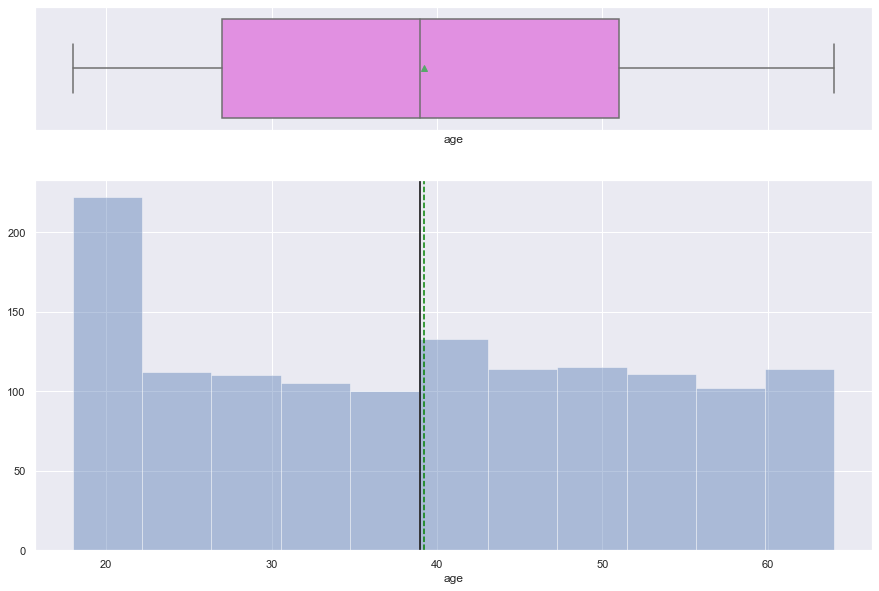

In [51]:
histogram_boxplot(data["age"])

In [52]:
data["age"].mode()

0    18
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


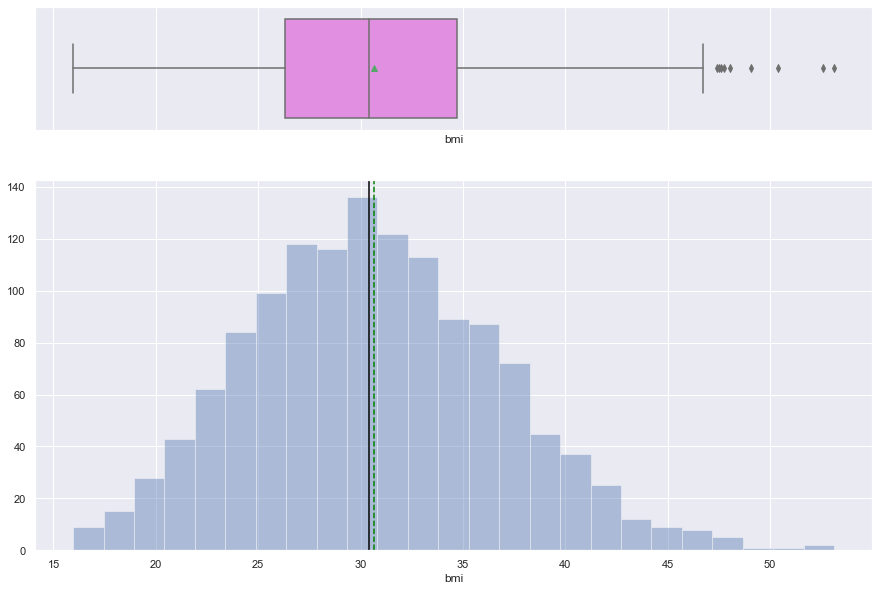

In [53]:
histogram_boxplot(data["bmi"])

In [175]:
# find number of people who are within ideal BMI
data[(data["bmi"]>=18.5) & (data["bmi"]<=24.9)].count()

age         222
sex         222
bmi         222
children    222
smoker      222
region      222
charges     222
dtype: int64

In [55]:
# find number of people who are above ideal BMI
data[data["bmi"]>24.9].count()

age         1096
sex         1096
bmi         1096
children    1096
smoker      1096
region      1096
charges     1096
dtype: int64

In [176]:
# find number of people who are below ideal BMI
data[data["bmi"]<18.5].count()

age         20
sex         20
bmi         20
children    20
smoker      20
region      20
charges     20
dtype: int64

In [56]:
data["bmi"].mode()

0    32.3
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


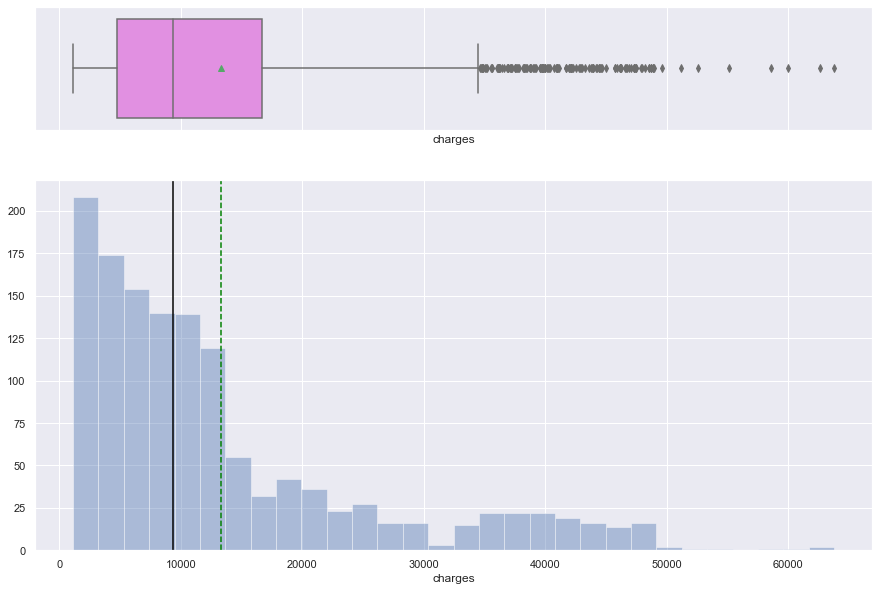

In [57]:
histogram_boxplot(data["charges"])

In [58]:
data["charges"].mode()

0    1639.5631
dtype: float64

In [59]:
# analyse categorical variable

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


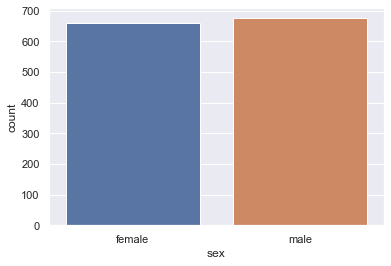

In [60]:
sns.countplot(data['sex']);

In [177]:
# find number of men and women
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


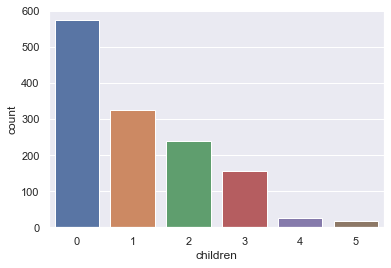

In [62]:
sns.countplot(data['children']);

In [180]:
# find number of customers with 0 to 5 children
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


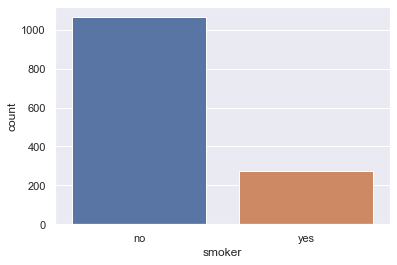

In [63]:
sns.countplot(data['smoker']);

In [64]:
# find numbers of smokers
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


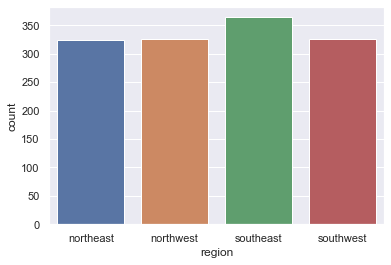

In [65]:
sns.countplot(data['region']);

In [66]:
# Start of multivariate analysis

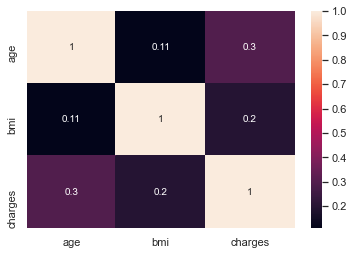

In [178]:
sns.heatmap(data.corr(),annot=True);

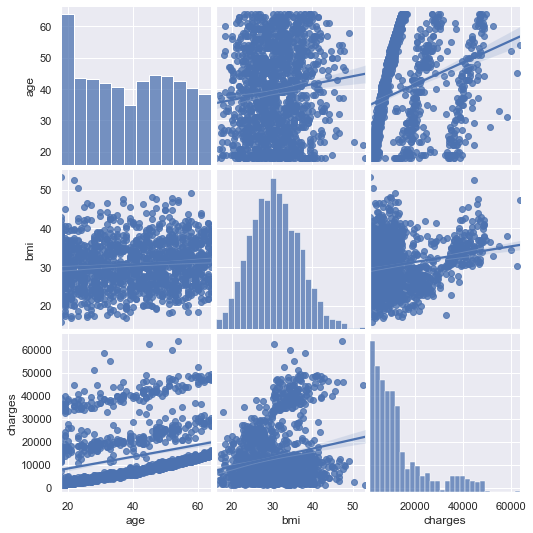

In [68]:
sns.pairplot(data,kind='reg');

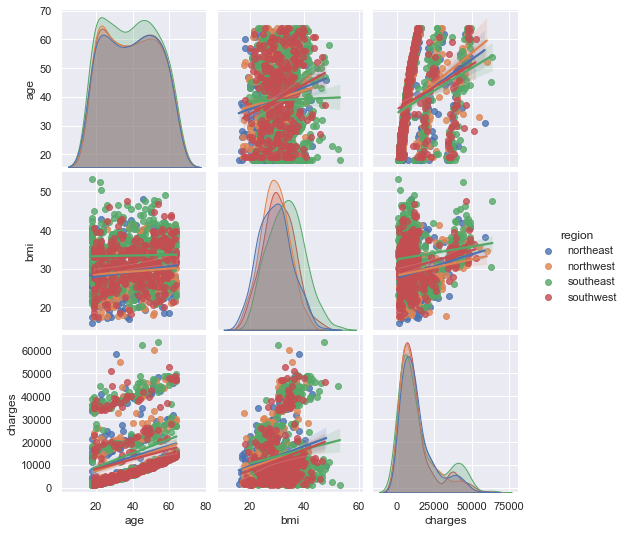

In [69]:
sns.pairplot(data,kind='reg',hue="region");

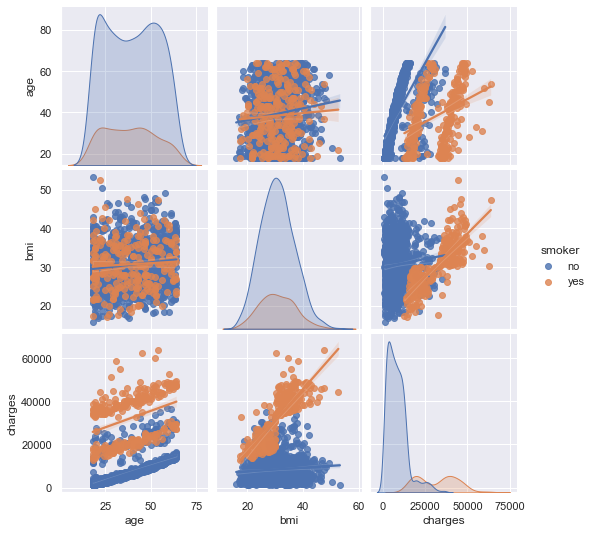

In [209]:
sns.pairplot(data,kind='reg',hue="smoker");

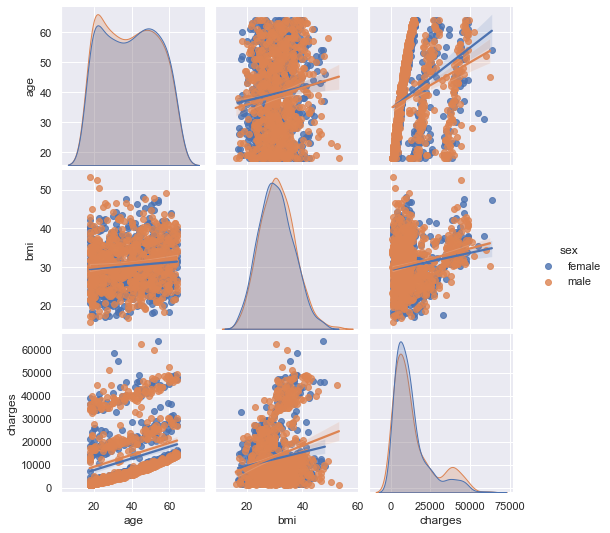

In [211]:
sns.pairplot(data,kind='reg',hue="sex");

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


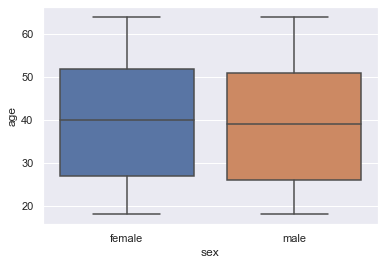

In [70]:
sns.boxplot(data['sex'],data['age']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


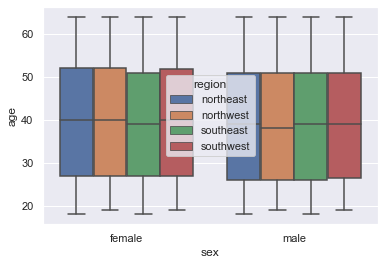

In [71]:
sns.boxplot(data['sex'],data['age'],hue=data['region']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


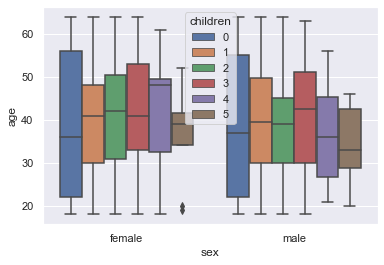

In [72]:
sns.boxplot(data['sex'],data['age'],hue=data['children']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


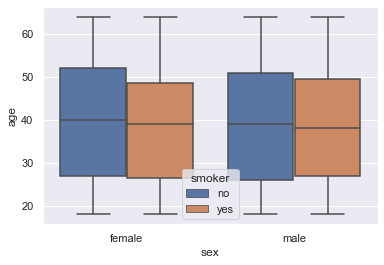

In [73]:
sns.boxplot(data['sex'],data['age'],hue=data['smoker']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


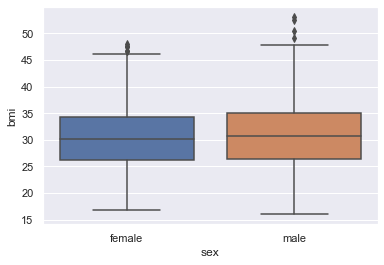

In [74]:
sns.boxplot(data['sex'],data['bmi']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


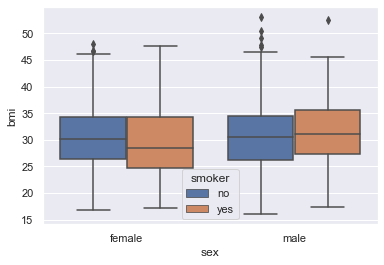

In [75]:
sns.boxplot(data['sex'],data['bmi'],hue=data['smoker']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


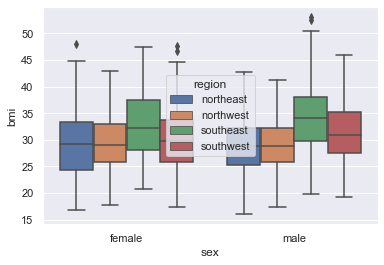

In [76]:
sns.boxplot(data['sex'],data['bmi'],hue=data['region']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


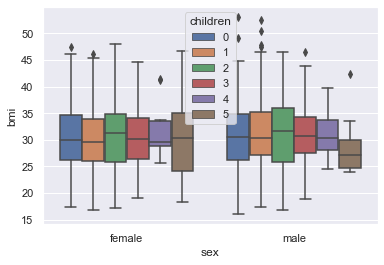

In [77]:
sns.boxplot(data['sex'],data['bmi'],hue=data['children']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


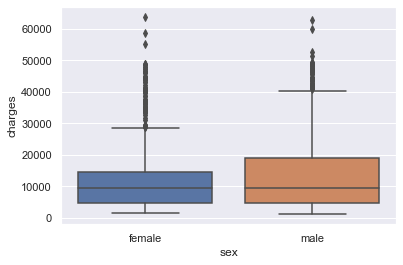

In [78]:
sns.boxplot(data['sex'],data['charges']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


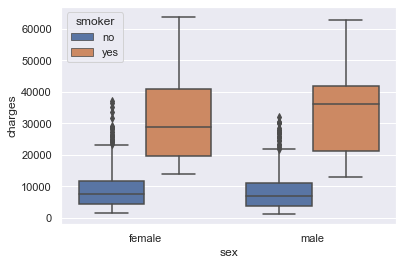

In [79]:
sns.boxplot(data['sex'],data['charges'],hue=data['smoker']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


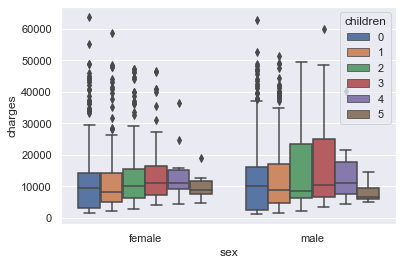

In [80]:
sns.boxplot(data['sex'],data['charges'],hue=data['children']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


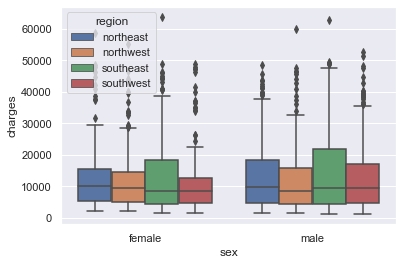

In [81]:
sns.boxplot(data['sex'],data['charges'],hue=data['region']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


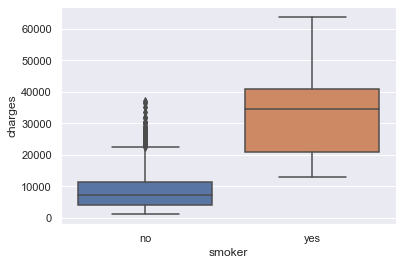

In [82]:
sns.boxplot(data['smoker'],data['charges']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


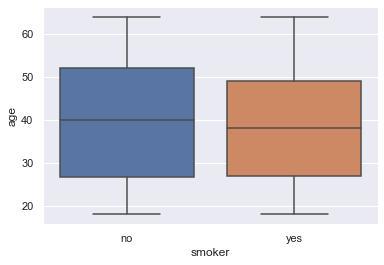

In [83]:
sns.boxplot(data['smoker'],data['age']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


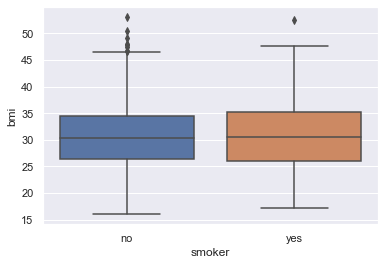

In [84]:
sns.boxplot(data['smoker'],data['bmi']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


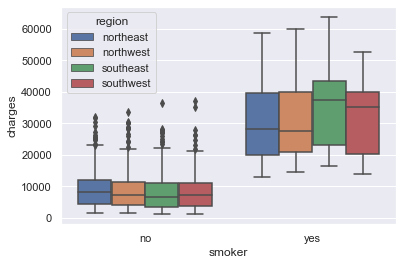

In [85]:
sns.boxplot(data['smoker'],data['charges'],hue=data['region']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


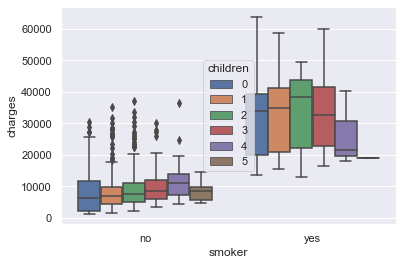

In [86]:
sns.boxplot(data['smoker'],data['charges'],hue=data['children']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


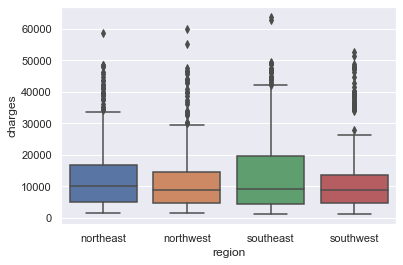

In [87]:
sns.boxplot(data['region'],data['charges']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


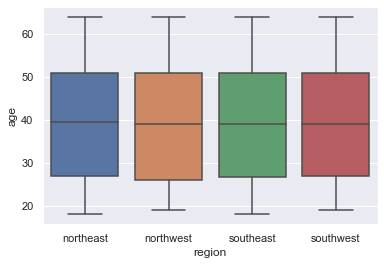

In [88]:
sns.boxplot(data['region'],data['age']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


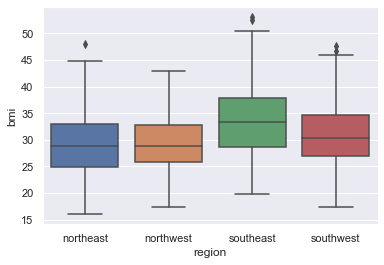

In [89]:
sns.boxplot(data['region'],data['bmi']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


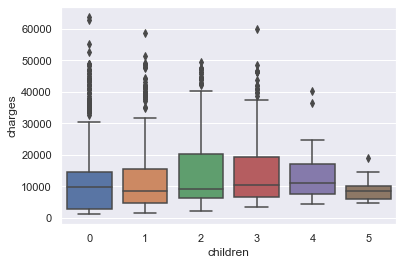

In [90]:
sns.boxplot(data['children'],data['charges']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


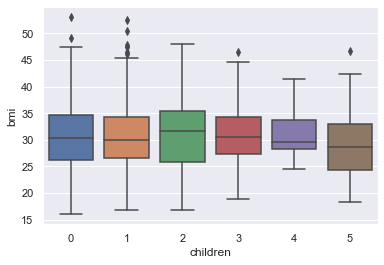

In [91]:
sns.boxplot(data['children'],data['bmi']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


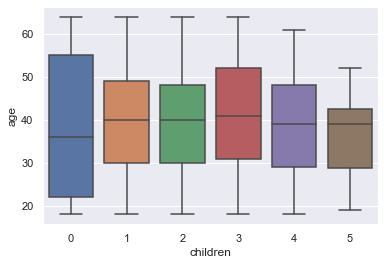

In [92]:
sns.boxplot(data['children'],data['age']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


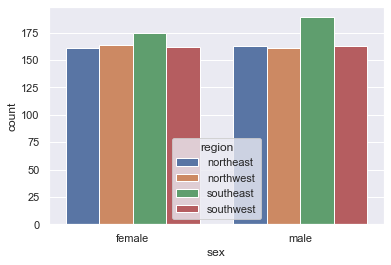

In [93]:
sns.countplot(data['sex'],hue=data['region']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


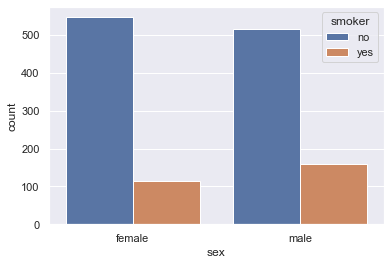

In [94]:
sns.countplot(data['sex'],hue=data['smoker']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


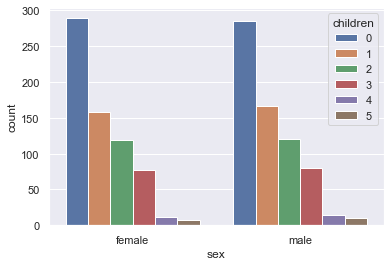

In [95]:
sns.countplot(data['sex'],hue=data['children']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


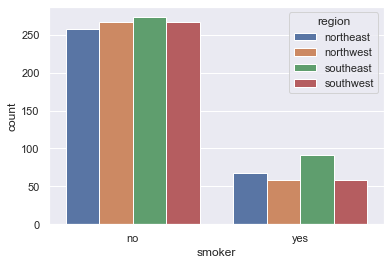

In [96]:
sns.countplot(data['smoker'],hue=data['region']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


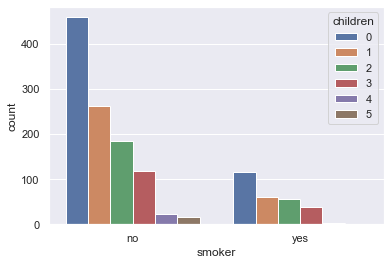

In [97]:
sns.countplot(data['smoker'],hue=data['children']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


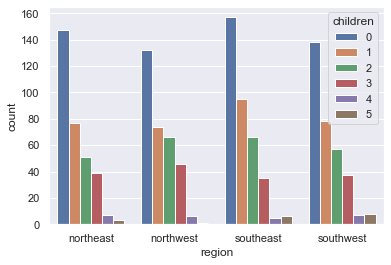

In [98]:
sns.countplot(data['region'],hue=data['children']);

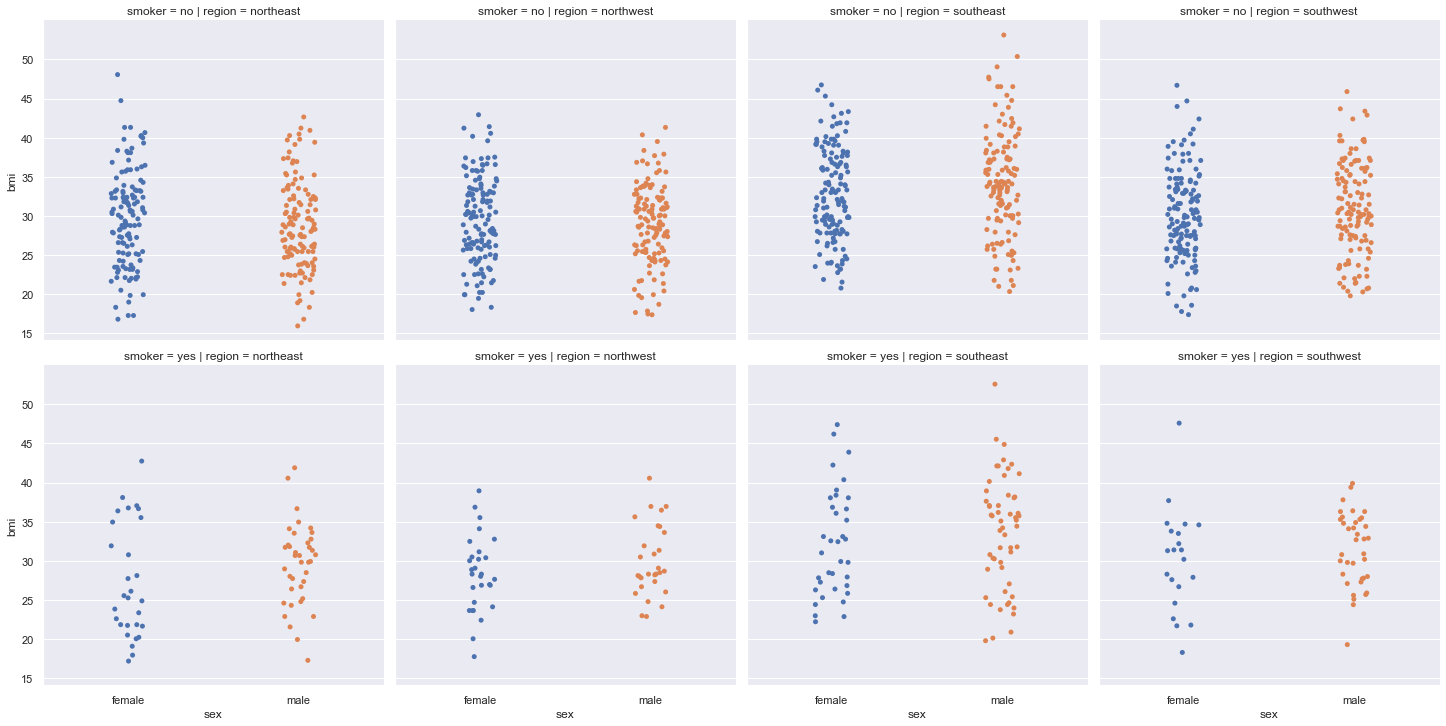

In [99]:
sns.catplot(x='sex',y='bmi',col='region',row='smoker',data=data);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


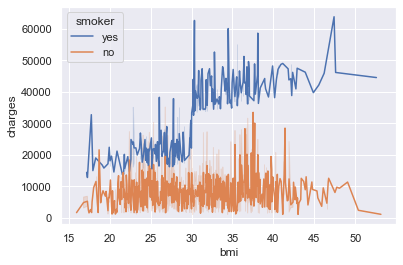

In [282]:
sns.lineplot(data["bmi"],data["charges"],hue=data["smoker"]);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


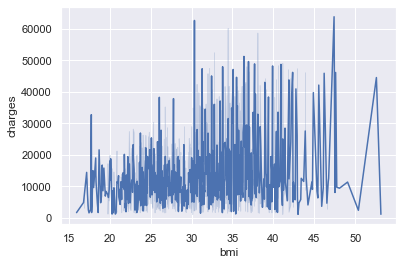

In [657]:
sns.lineplot(data["bmi"],data["charges"]);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


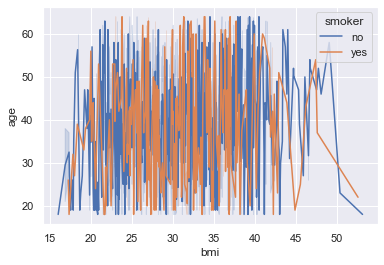

In [101]:
sns.lineplot(data["bmi"],data["age"],hue=data["smoker"]);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


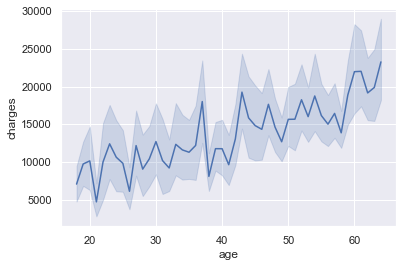

In [280]:
sns.lineplot(data["age"],data["charges"]);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


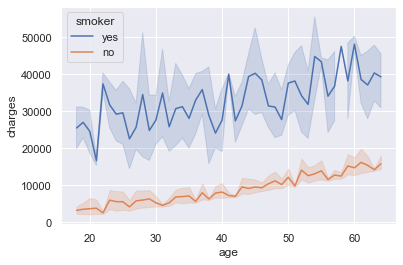

In [281]:
sns.lineplot(data["age"],data["charges"],hue=data["smoker"]);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


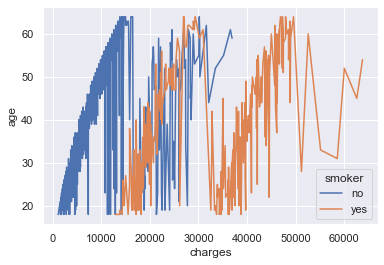

In [102]:
sns.lineplot(data["charges"],data["age"],hue=data["smoker"]);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


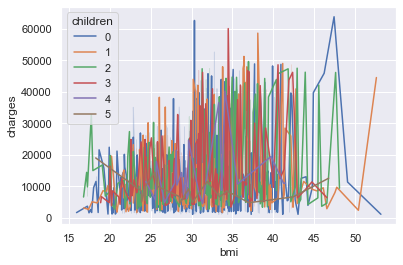

In [103]:
sns.lineplot(data["bmi"],data["charges"],hue=data["children"]);

In [221]:
# create a copy so that we can manipulate the copy without impacting original dataset
cdata=data.copy()

In [222]:
# check copy
cdata.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [224]:
# create a last column
cdata[7]='nf'    

In [225]:
# assign whether a customer has under, over or healthy BMI-
# Ovr- BMI above 24.9
# Healthy- BMI between 18.5 and 24.9
# Und- BMI below 18.5

for i in range(0,1338):
    if cdata.iloc[i,2] < 18.5:
        cdata.iloc[i,7]='Und'
    elif cdata.iloc[i,2] > 24.9:               
        cdata.iloc[i,7]='Ovr'        
    else:
        cdata.iloc[i,7]='healthy'        
        

In [226]:
# check newly assigned value
cdata.head()

,age,sex,bmi,children,smoker,region,charges,7
0,19,female,27.900,0,yes,southwest,16884.92400,Ovr
1,18,male,33.770,1,no,southeast,1725.55230,Ovr
2,28,male,33.000,3,no,southeast,4449.46200,Ovr
3,33,male,22.705,0,no,northwest,21984.47061,healthy
4,32,male,28.880,0,no,northwest,3866.85520,Ovr


In [189]:
# put column name for the new column
cdata.rename(columns = {7:'bmiind'},inplace=True)

In [190]:
cdata.head()

,age,sex,bmi,children,smoker,region,charges,bmiind
0,19,female,27.900,0,yes,southwest,16884.92400,Ovr
1,18,male,33.770,1,no,southeast,1725.55230,Ovr
2,28,male,33.000,3,no,southeast,4449.46200,Ovr
3,33,male,22.705,0,no,northwest,21984.47061,healthy
4,32,male,28.880,0,no,northwest,3866.85520,Ovr


In [191]:
# check whether any customer not assigned to correct bmiind
cdata[cdata['bmiind']=='nf']

,age,sex,bmi,children,smoker,region,charges,bmiind


In [192]:
# checking numbers in each category aligns with previous analysis
cdata.groupby(['bmiind']).count()

,age,sex,bmi,children,smoker,region,charges
bmiind,,,,,,,
Ovr,1096,1096,1096,1096,1096,1096,1096
Und,20,20,20,20,20,20,20
healthy,222,222,222,222,222,222,222


In [ ]:
# do analysis based on new column-bmiind

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


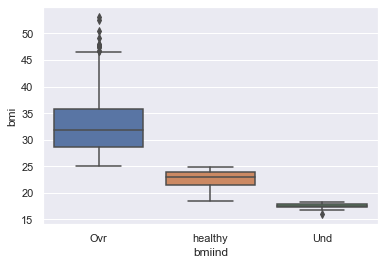

In [193]:

sns.boxplot(cdata['bmiind'],data['bmi']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


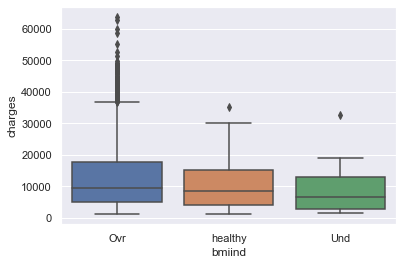

In [114]:
sns.boxplot(cdata['bmiind'],data['charges']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


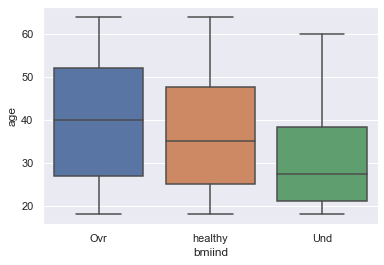

In [115]:
sns.boxplot(cdata['bmiind'],data['age']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


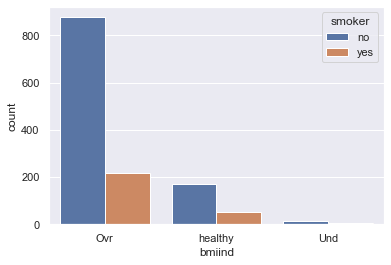

In [116]:
sns.countplot(cdata['bmiind'],hue=data['smoker']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


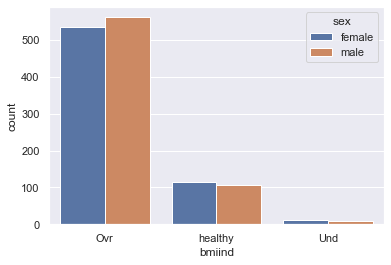

In [117]:
sns.countplot(cdata['bmiind'],hue=data['sex']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


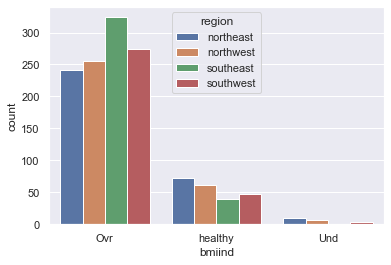

In [118]:
sns.countplot(cdata['bmiind'],hue=data['region']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


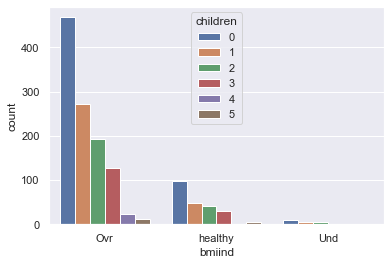

In [119]:
sns.countplot(cdata['bmiind'],hue=data['children']);

In [ ]:
# Start of hypothesis testing

In [200]:
# Question-Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't? [Hint- Formulate a hypothesis and prove/disprove it]
# split the data into two series- one with smokers charges-smk_bill and other one with non-smokers charges-nosmk_bill
smk_bill=data[data['smoker']=='yes']['charges']

In [195]:
smk_bill.count()

274

In [196]:
smk_bill.head()

0     16884.9240
11    27808.7251
14    39611.7577
19    36837.4670
23    37701.8768
Name: charges, dtype: float64

In [201]:
# split the data into two series- one with smokers charges-smk_bill and other one with non-smokers charges-nosmk_bill
nosmk_bill=data[data['smoker']=='no']['charges']

In [198]:
nosmk_bill.count()

1064

In [199]:
nosmk_bill.head()

1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64

In [202]:
import numpy as np

from scipy.stats import ttest_1samp, wilcoxon
from scipy.stats import ttest_ind, wilcoxon
from statsmodels.stats.power import ttest_power

In [213]:
# Do one tail two sample t-test
t_statistic, p_value = ttest_ind(smk_bill, nosmk_bill)
print (t_statistic)
print (p_value)

46.664921172723716
8.271435842177219e-283


In [214]:
# P should be halved for one tail test. Still we can reject hypothesis as p< alpha i.e. support means charges of smokers higher than non-smokers
p_val_onetail=p_value/2
print (p_val_onetail)

4.1357179210886093e-283


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


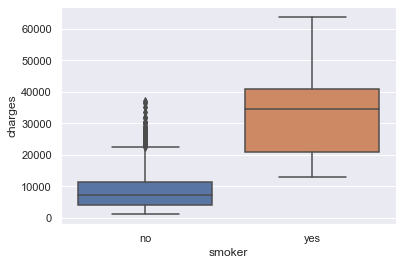

In [170]:
# check the box plot for charges for smokers and others
sns.boxplot(data['smoker'],data['charges']);
# smokers have higher means which support above hypthesis finding

In [126]:
# split the data into two series- one with male bmi-male_bmi and other one with female bmi-female_bmi
male_bmi=data[data['sex']=='male']['bmi']

In [127]:
male_bmi.head()

1    33.770
2    33.000
3    22.705
4    28.880
8    29.830
Name: bmi, dtype: float64

In [146]:
male_bmi.count()

676

In [128]:
# split the data into two series- one with male bmi-male_bmi and other one with female bmi-female_bmi
female_bmi=data[data['sex']=='female']['bmi']

In [129]:
female_bmi.head()

0    27.90
5    25.74
6    33.44
7    27.74
9    25.84
Name: bmi, dtype: float64

In [147]:
# check the total size of two series add up to total number of customers
print(male_bmi.count()+female_bmi.count())

1338


In [130]:
# Do two tail two sample t-test
t_statistic, p_value = ttest_ind(female_bmi,male_bmi)
print (t_statistic)
print (p_value)
# we fail to reject hypothesis than men and females have equal bmi

-1.696752635752224
0.08997637178984932


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


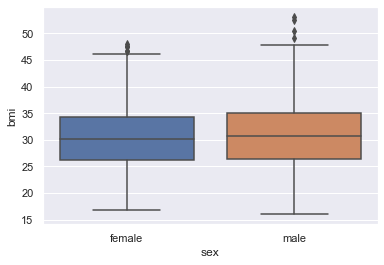

In [171]:
# check the box plot for bmi for males and females
sns.boxplot(data['sex'],data['bmi']);
# They have similar bmi and similar shapes/dispersion which supports the outcomes of the hypothesis testing

In [131]:
child_bmi=data[['children','bmi']]

In [132]:
child_bmi.head()

,children,bmi
0,0,27.900
1,1,33.770
2,3,33.000
3,0,22.705
4,0,28.880


In [133]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 

In [156]:
# create table which has data of females with no, 1 or 2 dependents
bmifmlchild=data[((data['children']==0) | (data['children']==1) | (data['children']==2)) & (data['sex']=='female')]

In [161]:
bmifmlchild.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
9,60,female,25.84,0,no,northwest,28923.13692
11,62,female,26.29,0,yes,southeast,27808.72510


In [206]:
# check number of men or women with 3,4,5 dependents
data[((data['children']==3) | (data['children']==4) | (data['children']==5))]['sex'].value_counts()

male      104
female     96
Name: sex, dtype: int64

In [154]:
bmifmlchild.count()


age         566
sex         566
bmi         566
children    566
smoker      566
region      566
charges     566
dtype: int64

In [207]:
data['sex'].value_counts()
# 566+96 from above makes the number below 662

male      676
female    662
Name: sex, dtype: int64

In [208]:
data.groupby(['sex','children']).count()
# the top 3 rows add up to 566 which confirms bmifmlchild has the correct number of rows

age  bmi  smoker  region  charges
sex    children                                   
female 0         289  289     289     289      289
       1         158  158     158     158      158
       2         119  119     119     119      119
       3          77   77      77      77       77
       4          11   11      11      11       11
       5           8    8       8       8        8
male   0         285  285     285     285      285
       1         166  166     166     166      166
       2         121  121     121     121      121
       3          80   80      80      80       80
       4          14   14      14      14       14
       5          10   10      10      10       10

In [215]:
# perform one way ANOVA test between bmi and number of children
mod = ols('bmi ~ C(children)', data = bmifmlchild).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                   sum_sq     df         F    PR(>F)
C(children)     61.475308    5.0  0.334472  0.715858
Residual     20695.661583  563.0       NaN       NaN


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 2
  warnings.warn('covariance of constraints does not have full '


In [ ]:
# p>alpha. So we fail to reject the hypothesis that the means of BMI of women with no children, one child, and two children are the same

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


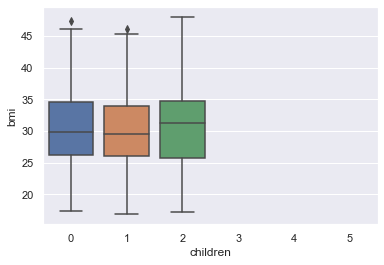

In [172]:
sns.boxplot(bmifmlchild['children'],bmifmlchild['bmi']);
# box plot above shows means which are close and similar distribution of the box. This support the above hypothesis testing

In [139]:
# get number of smokers and non-smokers in each region
data_smokreg=data.groupby(['region','smoker'])['smoker'].count()

In [140]:
data_smokreg

region     smoker
northeast  no        257
           yes        67
northwest  no        267
           yes        58
southeast  no        273
           yes        91
southwest  no        267
           yes        58
Name: smoker, dtype: int64

In [141]:
# create a contingency table with first row for smokers and second for non-smokers. the solums are in the above order of region.
data_smoke_arr=np.array([data_smokreg[1],data_smokreg[3],data_smokreg[5],data_smokreg[7]])
data_nonsmoke_arr=np.array([data_smokreg[0],data_smokreg[2],data_smokreg[4],data_smokreg[6]])
data_smoke_nsmoke=np.array([data_smoke_arr,data_nonsmoke_arr])

In [142]:
data_smoke_nsmoke

array([[ 67,  58,  91,  58],
       [257, 267, 273, 267]], dtype=int64)

In [166]:
# perform chi2 contingency test
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(data_smoke_nsmoke)
print (p)

0.06171954839170547


In [ ]:
# p> alpha. So we cannot reject the hypothesis that the propotion of smokers are not siginifcantly different across regions.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


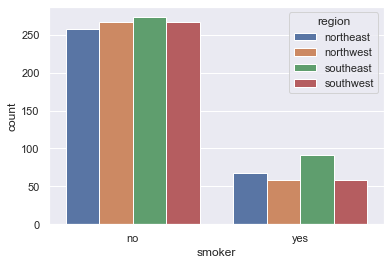

In [173]:
sns.countplot(data['smoker'],hue=data['region']);
# below box grpah shows that the across regions, the number of smokers and non-smokers are almost same

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [263]:
data_ml=data.copy()
# data_ml=data_ml.drop(['S.No.','Name','km_log'], axis=1)

In [260]:
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
744,50,26.41,0,0,1,1,0,0,1,0,0
363,21,26.40,1,1,0,1,0,0,0,0,1
10,25,26.22,0,0,1,1,0,1,0,0,0
970,50,28.16,3,1,0,1,0,0,0,1,0
634,51,39.70,1,0,1,1,0,0,0,0,1


In [264]:
# Lets treat outliers by flooring and capping
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df
# col_list=['Year','Kilometers_Driven','Mileage','Power','Price_x','New_Price_x']
col_list=['age','bmi','children']
# col_list=['Year','Kilometers_Driven','Mileage','Engine']
# col_list=['Year','Kilometers_Driven','Mileage','Engine','New_Price']
for c in col_list:
    data_ml= treat_outliers(data_ml,c)      

In [265]:
# data_ml=data_ml.drop(['region'], axis=1)
data_ml= pd.get_dummies(data_ml,columns=['sex','smoker','region'])
# data_ml= pd.get_dummies(data_ml,columns=['sex','smoker'])
# data_ml=data_ml.drop(['sex_male','smoker_yes','region_northwest'], axis=1)

In [266]:
# independant variables
X = data_ml.drop(['charges'], axis=1)
# X = data_ml.drop(['Price_x','Cont_Europe','Cont_India','Cont_Japan','Cont_Korea'], axis=1)
# X = data_ml.drop(['Price_x','New_Price_x'], axis=1)
# the dependent variable
y = data_ml[['charges']]

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [269]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [270]:
regression_model.score(X_train, y_train)

0.7546391460846524

In [271]:
regression_model.score(X_test, y_test)

0.740729938826683

In [272]:
import statsmodels.api as sm
X = sm.add_constant(X)
X_train1, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

olsmod0 = sm.OLS(y_train, X_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

ImportError: No module named 'statsmodels'

In [236]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_r2=metrics.r2_score(y_train,pred_train)
    test_r2=metrics.r2_score(y_test,pred_test)
    train_rmse=np.sqrt(metrics.mean_squared_error(y_train,pred_train))
    test_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_test))
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-sqaure on training set : ",metrics.r2_score(y_train,pred_train))
        print("R-square on test set : ",metrics.r2_score(y_test,pred_test))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train,pred_train)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test,pred_test)))
    
    # returning the list with train and test scores
    return score_list

In [311]:
pred_test = rf_tuned.predict(X_test)
mean_squared_error(y_test,pred_test)**0.5

4511.159846679492

In [26]:
!pip install xgboost

mkl-random 1.0.1 requires cython, which is not installed.
tensorflow 1.10.0 has requirement numpy<=1.14.5,>=1.13.3, but you'll have numpy 1.15.2 which is incompatible.
tensorflow 1.10.0 has requirement setuptools<=39.1.0, but you'll have setuptools 40.2.0 which is incompatible.
You are using pip version 10.0.1, however version 20.3.4 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
# from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

C:\ProgramData\Anaconda3\envs\tfdeeplearning1\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [28]:
dtree=DecisionTreeRegressor(random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [29]:
X_test.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
559,19,35.53,0,0,1,1,0,0,1,0,0
1087,57,31.54,0,0,1,1,0,0,1,0,0
1020,51,37.00,0,0,1,1,0,0,0,0,1
460,49,36.63,3,1,0,1,0,0,0,1,0
802,21,22.30,1,0,1,1,0,0,0,0,1


In [30]:
dtree_score=get_model_score(dtree)

R-sqaure on training set :  1.0
R-square on test set :  0.739684909196051
RMSE on training set :  0.0
RMSE on test set :  6073.795236852656


In [31]:
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': list(np.arange(2,20)) + [None], 
              'min_samples_leaf': [1, 3, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10, 15] + [None],
              'min_impurity_decrease': [0.001, 0.01, 0.1, 0.0]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.001,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [309]:
dtree_tuned_score=get_model_score(dtree_tuned)

R-sqaure on training set :  0.8784075862795221
R-square on test set :  0.850756927384472
RMSE on training set :  4250.941408138173
RMSE on test set :  4598.938106477123


In [27]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                       Imp
smoker_no         0.729986
bmi               0.158917
age               0.106619
children          0.004478
sex_female        0.000000
region_northeast  0.000000
region_southeast  0.000000
region_southwest  0.000000


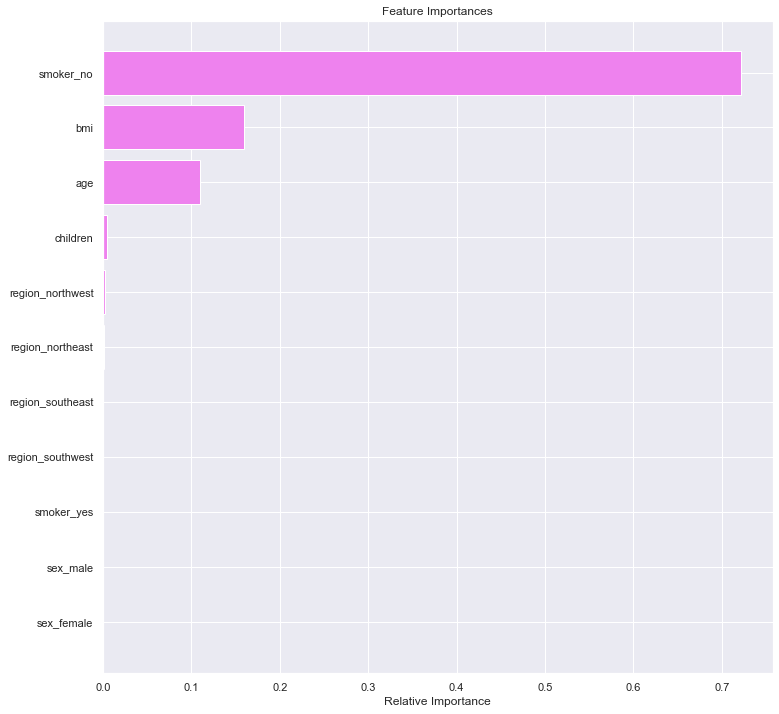

In [284]:
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [17]:
rf_estimator=RandomForestRegressor(random_state=1)
rf_estimator.fit(X_train,y_train)

<ipython-input-17-67d590399f7b>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_estimator.fit(X_train,y_train)


RandomForestRegressor(random_state=1)

In [18]:
rf_estimator_score=get_model_score(rf_estimator)

R-sqaure on training set :  0.9764175299136653
R-square on test set :  0.8322191273392765
RMSE on training set :  1872.089145780955
RMSE on test set :  4876.202113616804


In [273]:
# Choose the type of classifier. 
rf_tuned = RandomForestRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {  
#                 'max_depth':[4, 6, 8, 10, None],
#                 'max_features': ['sqrt','log2',None],
#                 'n_estimators': [80, 90, 100, 110, 120]
    'max_depth':[4],
                'max_features': [None],
                'n_estimators': [120]

}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train.values.ravel())

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

C:\ProgramData\Anaconda3\envs\tfdeeplearning1\lib\site-packages\ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [274]:
rf_tuned_score=get_model_score(rf_tuned)

R-sqaure on training set :  0.8778819157229736
R-square on test set :  0.8563996547251985
RMSE on training set :  4260.120372161863
RMSE on test set :  4511.159846679492


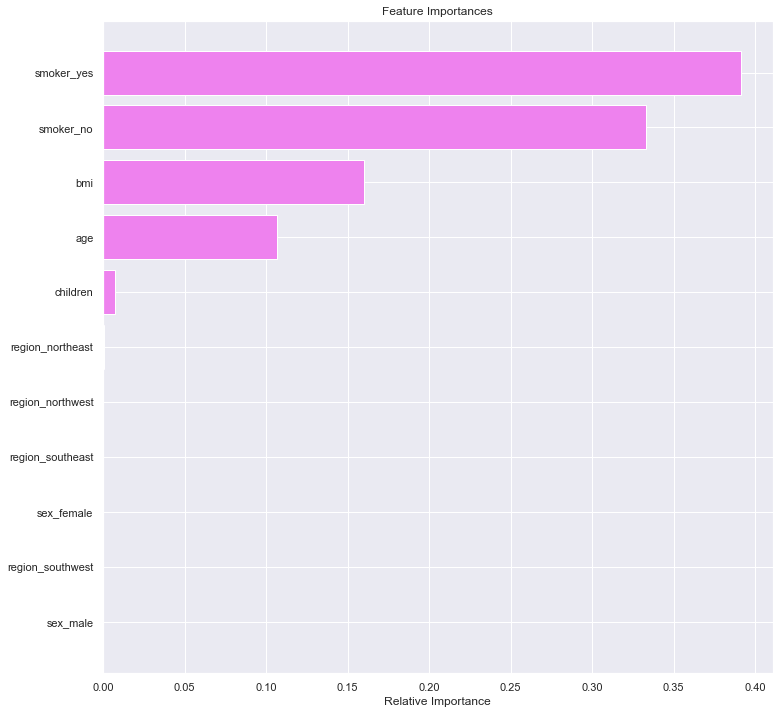

In [23]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [164]:
X_test.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
559,19,35.53,0,0,1,1,0,0,1,0,0
1087,57,31.54,0,0,1,1,0,0,1,0,0
1020,51,37.00,0,0,1,1,0,0,0,0,1
460,49,36.63,3,1,0,1,0,0,0,1,0
802,21,22.30,1,0,1,1,0,0,0,0,1


In [243]:
pred_test = rf_tuned.predict(X_test)
pred_test

array([ 3488.34839931, 13174.54438468, 10197.20415665, 10712.06802224,
        3762.73029471, 38527.35986169, 10617.04488332, 13187.32749859,
        5649.24449332, 19938.29167865, 13953.97672673, 14279.83925471,
        6970.37900852,  7131.15039445,  3358.29776461, 10684.32434737,
        5885.23631885,  6665.08874182, 14054.70287141, 13941.79936298,
       12103.54713521, 39181.52098163,  8956.68094252, 10345.89553189,
        3515.81352999,  7121.02711691,  8399.14360457, 10049.58064912,
        6551.41278012,  6099.39790168, 13358.43307084,  6572.57767928,
       23693.51556444, 35933.63016856, 24732.70891766, 12931.47303482,
       38710.72817778, 18188.00836321, 13351.89294178, 46175.74763541,
        6548.532061  , 13204.51052537, 11061.21299788, 13983.12988276,
        6455.30151712, 13861.17759543,  3719.47521902, 35957.33089036,
       10803.6138268 , 18319.7760807 , 14006.38155072, 14190.08447913,
        4189.63028261,  9078.94115497, 17927.59919612,  5689.13025597,
      

In [246]:
dataset = pd.DataFrame(pred_test)

In [248]:
dataset[0]

0       3488.348399
1      13174.544385
2      10197.204157
3      10712.068022
4       3762.730295
5      38527.359862
6      10617.044883
7      13187.327499
8       5649.244493
9      19938.291679
10     13953.976727
11     14279.839255
12      6970.379009
13      7131.150394
14      3358.297765
15     10684.324347
16      5885.236319
17      6665.088742
18     14054.702871
19     13941.799363
20     12103.547135
21     39181.520982
22      8956.680943
23     10345.895532
24      3515.813530
25      7121.027117
26      8399.143605
27     10049.580649
28      6551.412780
29      6099.397902
           ...     
372     6991.901376
373    10488.880862
374     7088.192393
375    10793.361774
376    15025.781612
377     3535.241345
378     7556.800441
379    13223.085952
380     7232.320214
381    19903.421500
382    19202.411052
383    24181.191857
384    10221.073853
385    14453.844866
386    13957.737774
387     5565.962217
388     6380.438950
389    13368.088086
390    40252.495768


In [258]:
y_test

,charges
559,1646.42970
1087,11353.22760
1020,8798.59300
460,10381.47870
802,2103.08000
298,38746.35510
481,9304.70190
616,11658.11505
763,3070.80870
750,19539.24300


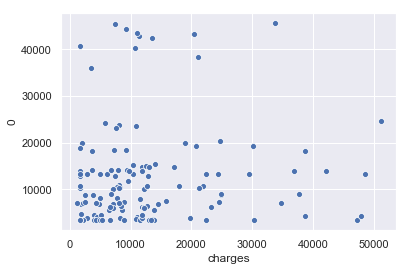

In [259]:
sns.scatterplot(y_test['charges'],dataset[0]);

In [275]:
data[data_ml['charges']>20000].

,age,sex,bmi,children,smoker,region,charges
3,33,male,22.705,0,no,northwest,21984.47061
9,60,female,25.840,0,no,northwest,28923.13692
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
34,28,male,36.400,1,yes,southwest,51194.55914
38,35,male,36.670,1,yes,northeast,39774.27630


In [43]:
ab_regressor=AdaBoostRegressor(random_state=1)
ab_regressor.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AdaBoostRegressor(random_state=1)

In [44]:
ab_regressor_score=get_model_score(ab_regressor)

R-sqaure on training set :  0.8434584251204245
R-square on test set :  0.8206294331632777
RMSE on training set :  4823.327248514666
RMSE on test set :  5041.8052274563815


In [46]:
# Choose the type of classifier. 
ab_tuned = AdaBoostRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10,100,10), 
              'learning_rate': [1, 0.1, 0.5, 0.01],
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train.values.ravel())

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
ab_tuned.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AdaBoostRegressor(learning_rate=0.01, n_estimators=40, random_state=1)

In [311]:
gb_estimator=GradientBoostingRegressor(random_state=1)
gb_estimator.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor(random_state=1)

In [312]:
gb_estimator_score=get_model_score(gb_estimator)

R-sqaure on training set :  0.9047900425118741
R-square on test set :  0.8593746304799663
RMSE on training set :  3761.6039236773695
RMSE on test set :  4464.186319623593


In [50]:
# Choose the type of classifier. 
gb_tuned = GradientBoostingRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,200,25), 
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train.values.ravel())

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor(max_features=0.8, n_estimators=50, random_state=1,
                          subsample=0.8)

In [51]:
gb_tuned_score=get_model_score(gb_tuned)

R-sqaure on training set :  0.8892486272136436
R-square on test set :  0.8589832028227975
RMSE on training set :  4057.013363276492
RMSE on test set :  4470.394984962368


In [323]:
xgb_estimator=XGBRegressor(random_state=1)
xgb_estimator.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [324]:
xgb_estimator_score=get_model_score(xgb_estimator)

R-sqaure on training set :  0.996672562914463
R-square on test set :  0.7992760498432034
RMSE on training set :  703.2128619598302
RMSE on test set :  5333.472639029933


In [385]:
# Choose the type of classifier. 
xgb_tuned = XGBRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {
    
#      "n_estimators": np.arange(10,100,20),
#      "scale_pos_weight":[5],
#      "subsample":[0.7,0.9,1],
#      "learning_rate":[0.1,0.2,0.3,0.05],
#  "gamma":[1,3],
# #   "gamma":[0,1,3],
#  "colsample_bytree":[0.5,0.7],
#  "colsample_bylevel":[0.5,0.7]
    
        "n_estimators": np.arange(10,50,10),
     "scale_pos_weight":[2,5],
     "subsample":[0.7,0.8,0.9,1],
     "learning_rate":[0.1,0.2],
 "gamma":[1,3],
    'max_depth':[3,4,6],
     "colsample_bytree":[0.7],
#   "gamma":[0,1,3],
#  "colsample_bytree":[0.5,0.7],
#  "colsample_bylevel":[0.5,0.7]
            }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
xgb_tuned.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=40, n_jobs=4, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=2, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [326]:
from sklearn.model_selection import RandomizedSearchCV

In [377]:
# Choose the type of classifier. 
xgb_tuned = XGBRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {
    
#    "n_estimators": np.arange(10,100,20),
    "n_estimators": np.arange(10,60,20),
     "scale_pos_weight":[2,5],
   "subsample":[0.5,0.7,0.9,1],
#   "subsample":[0.7],

#     "n_estimators": np.arange(10,100,20),
     "learning_rate":[0.1,0.2,0.3,0.4,0.5,0.05],
  "gamma":[0,1,3],
# #   "gamma":[0,1,3],
  "colsample_bytree":[0.5,0.7,1],
  "colsample_bylevel":[0.5,0.7,1],
     'max_depth':[2,3,4,5,6],
    
#         "n_estimators": np.arange(100),
#      "scale_pos_weight":[5],
#      "subsample":[0.7,0.9,1],
#      "learning_rate":[0.2],
#  "gamma":[3],
#   "gamma":[0,1,3],
# "colsample_bytree":[0.5,0.7],
#  "colsample_bylevel":[0.5,0.7]
            }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = RandomizedSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
xgb_tuned.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
             colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.4, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=4, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=2, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [377]:
# Choose the type of classifier. 
xgb_tuned = XGBRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {
    
#    "n_estimators": np.arange(10,100,20),
    "n_estimators": np.arange(10,60,20),
     "scale_pos_weight":[2,5],
   "subsample":[0.5,0.7,0.9,1],
#   "subsample":[0.7],

#     "n_estimators": np.arange(10,100,20),
     "learning_rate":[0.1,0.2,0.3,0.4,0.5,0.05],
  "gamma":[0,1,3],
# #   "gamma":[0,1,3],
  "colsample_bytree":[0.5,0.7,1],
  "colsample_bylevel":[0.5,0.7,1],
     'max_depth':[2,3,4,5,6],
    
#         "n_estimators": np.arange(100),
#      "scale_pos_weight":[5],
#      "subsample":[0.7,0.9,1],
#      "learning_rate":[0.2],
#  "gamma":[3],
#   "gamma":[0,1,3],
# "colsample_bytree":[0.5,0.7],
#  "colsample_bylevel":[0.5,0.7]
            }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = RandomizedSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
xgb_tuned.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
             colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.4, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=4, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=2, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [387]:
xgb_tuned_score=get_model_score(xgb_tuned)

R-sqaure on training set :  0.8762045781809329
R-square on test set :  0.8530077566890775
RMSE on training set :  4289.27776469221
RMSE on test set :  4564.126605041892


In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

In [ ]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
estimators=[('Decision Tree', dtree_tuned),('Random Forest', rf_tuned),
           ('Gradient Boosting', gb_tuned)]
final_estimator=XGBRegressor(random_state=1)

In [ ]:
stacking_estimator=StackingRegressor(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

In [ ]:
stacking_estimator_score=get_model_score(stacking_estimator)

In [252]:
cdata.rename(columns = {7:'bmiind'},inplace=True)
data_ml=cdata.copy()

# data_ml=data_ml.drop(['S.No.','Name','km_log'], axis=1)

In [234]:
cdata.head()

,age,sex,bmi,children,smoker,region,charges,bmiind
0,19,female,27.900,0,yes,southwest,16884.92400,Ovr
1,18,male,33.770,1,no,southeast,1725.55230,Ovr
2,28,male,33.000,3,no,southeast,4449.46200,Ovr
3,33,male,22.705,0,no,northwest,21984.47061,healthy
4,32,male,28.880,0,no,northwest,3866.85520,Ovr


In [242]:
# Lets treat outliers by flooring and capping
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df
# col_list=['Year','Kilometers_Driven','Mileage','Power','Price_x','New_Price_x']
col_list=['age','children']
# col_list=['Year','Kilometers_Driven','Mileage','Engine']
# col_list=['Year','Kilometers_Driven','Mileage','Engine','New_Price']
for c in col_list:
    data_ml= treat_outliers(data_ml,c)      

In [253]:
# data_ml=data_ml.drop(['Engine','Seats','Cont','First_Name'], axis=1)
data_ml=data_ml.drop(['bmi'], axis=1)
data_ml= pd.get_dummies(data_ml,columns=['sex','smoker','region','bmiind'])
# data_ml=data_ml.drop(['sex_male','smoker_yes','region_northwest','bmiind_Ovr'], axis=1)

In [254]:
# independant variables
X = data_ml.drop(['charges'], axis=1)
# X = data_ml.drop(['Price_x','Cont_Europe','Cont_India','Cont_Japan','Cont_Korea'], axis=1)
# X = data_ml.drop(['Price_x','New_Price_x'], axis=1)
# the dependent variable
y = data_ml[['charges']]

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [256]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [257]:
regression_model.score(X_train, y_train)

0.7417219745369024

In [258]:
regression_model.score(X_test, y_test)

0.7214868687455777

In [66]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [24]:
data_mlc=data.copy()

In [25]:
# find smoker
def find_smoker(val):
    if val=='yes':
        val=1
    else:
        val=0 
    return val
data_mlc['smoker'] = data_mlc['smoker'].apply(find_smoker)

In [558]:
data_mlc['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [26]:
data_mlc= pd.get_dummies(data_mlc,columns=['sex','region'])
Xc = data_mlc.drop(['smoker'], axis=1)
yc = data_mlc[['smoker']]
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.30, random_state=1)

In [27]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [28]:
dTree = DecisionTreeClassifier(criterion = 'gini', class_weight={0:0.2,1:0.8},random_state=1)
dTree.fit(Xc_train, yc_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

In [29]:
print("Accuracy on training set : ",dTree.score(Xc_train, yc_train))
print("Accuracy on test set : ",dTree.score(Xc_test, yc_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.9676616915422885


In [33]:
## Function to create confusion matrix
def make_confusion_matrix(model,yc_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    yc_predict = model.predict(Xc_test)
    cm=metrics.confusion_matrix( yc_actual, yc_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [519]:
# from sklearn.metrics import F1_score,make_scorer

In [32]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    predc_train = model.predict(Xc_train)
    predc_test = model.predict(Xc_test)
    print("Recall on training set : ",metrics.recall_score(yc_train,predc_train))
    print("Recall on test set : ",metrics.recall_score(yc_test,predc_test))
        
    print("f1 on training set : ",metrics.f1_score(yc_train,predc_train))
    print("f1 on test set : ",metrics.f1_score(yc_test,predc_test))

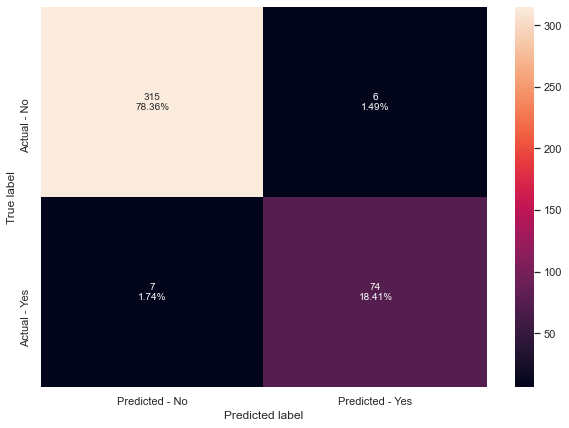

In [565]:
make_confusion_matrix(dTree,yc_test)

In [566]:
# Recall on train and test
get_recall_score(dTree)

Recall on training set :  1.0
Recall on test set :  0.9135802469135802
f1 on training set :  1.0
f1 on test set :  0.9192546583850932


In [567]:
feature_names = list(Xc.columns)
print(feature_names)

['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']


In [568]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = Xc_train.columns).sort_values(by = 'Imp', ascending = False))

                           Imp
charges           8.541151e-01
bmi               9.217151e-02
age               4.282783e-02
children          6.602954e-03
sex_female        2.112985e-03
region_northwest  2.112985e-03
region_southeast  5.666359e-05
region_northeast  2.111297e-17
sex_male          0.000000e+00
region_southwest  0.000000e+00


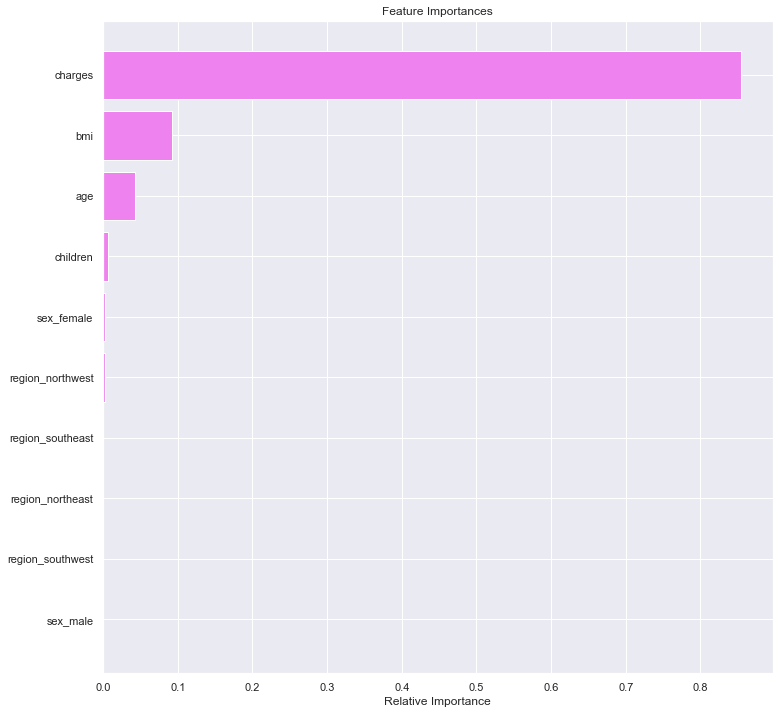

In [677]:
feature_names = Xc_train.columns
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [34]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,class_weight={0:0.20,1:0.80},random_state=1)
dTree1.fit(Xc_train, yc_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=3,
                       random_state=1)

In [35]:
# Accuracy on train and test
print("Accuracy on training set : ",dTree1.score(Xc_train, yc_train))
print("Accuracy on test set : ",dTree1.score(Xc_test, yc_test))
# Recall on train and test
get_recall_score(dTree1)

Accuracy on training set :  0.969017094017094
Accuracy on test set :  0.9651741293532339
Recall on training set :  1.0
Recall on test set :  0.9876543209876543
f1 on training set :  0.9301204819277108
f1 on test set :  0.9195402298850573


In [36]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], index = Xc_train.columns).sort_values(by = 'Imp', ascending = False))

                       Imp
charges           0.893229
bmi               0.087946
age               0.018288
children          0.000537
sex_female        0.000000
sex_male          0.000000
region_northeast  0.000000
region_northwest  0.000000
region_southeast  0.000000
region_southwest  0.000000


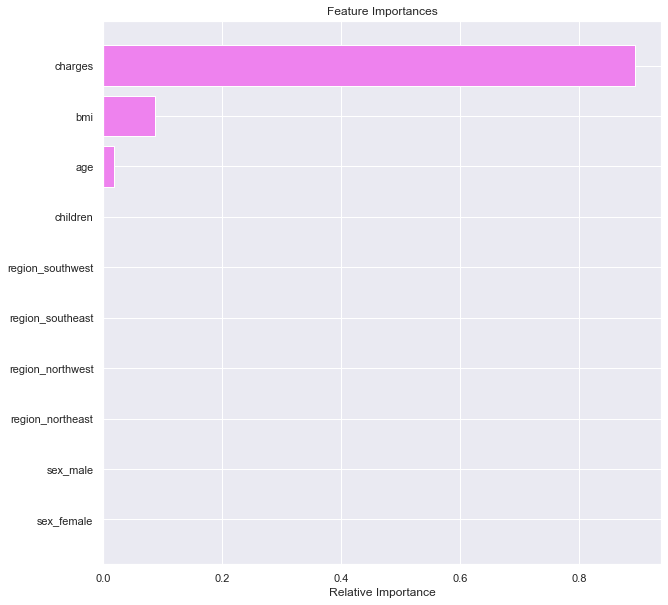

In [37]:
feature_names = Xc_train.columns
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
# from sklearn.metrics import make_scorer
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(class_weight={0:0.20,1:0.80},random_state=1)
# estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10), 
             'criterion': ['entropy','gini'],
#               'splitter': ['best','random'],
#  'min_impurity_decrease': [0.000001,0.00001,0.0001],
#             'max_features': ['log2','sqrt'],
                      'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
#               'max_leaf_nodes' : [2, 3, 5, 10],
#                'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
# acc_scorer = metrics.make_scorer(metrics.recall_score)
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
# grid_obj = GridSearchCV(estimator, parameters,scoring=make_scorer(f1_score(average='micro'),cv=5))
grid_obj = grid_obj.fit(Xc_train, yc_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(Xc_train, yc_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=9, min_samples_leaf=5, random_state=1)

In [40]:
# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(Xc_train, yc_train))
print("Accuracy on test set : ",estimator.score(Xc_test, yc_test))
# Recall on train and test
get_recall_score(estimator)

Accuracy on training set :  0.9850427350427351
Accuracy on test set :  0.9751243781094527
Recall on training set :  0.9948186528497409
Recall on test set :  0.9876543209876543
f1 on training set :  0.9648241206030151
f1 on test set :  0.9411764705882353


In [44]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = Xc_train.columns).sort_values(by = 'Imp', ascending = False))

                           Imp
charges           8.403408e-01
bmi               1.018517e-01
age               5.051693e-02
children          7.290616e-03
sex_male          2.203596e-17
region_southwest  8.373665e-18
sex_female        0.000000e+00
region_northeast  0.000000e+00
region_northwest  0.000000e+00
region_southeast  0.000000e+00


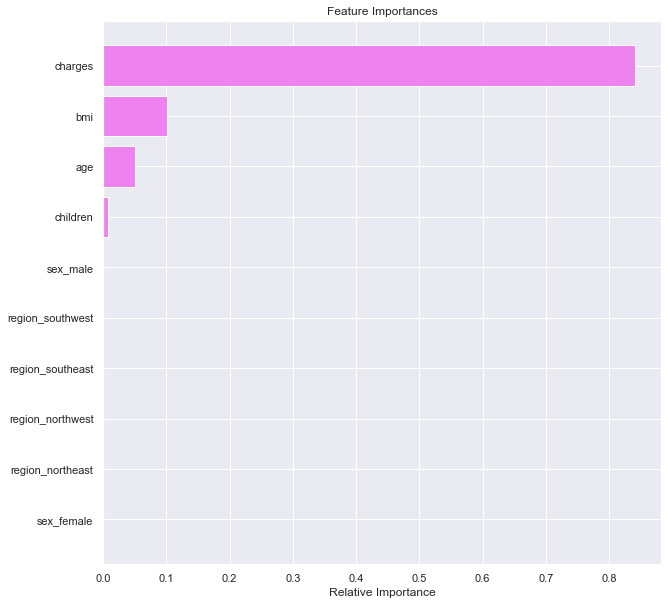

In [45]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

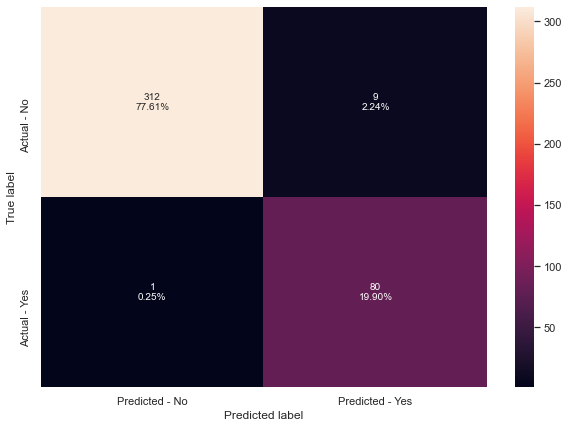

In [43]:
make_confusion_matrix(estimator,yc_test)

In [533]:
from xgboost import XGBClassifier

In [577]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    predc_train = model.predict(Xc_train)
    predc_test = model.predict(Xc_test)
    
    #Accuracy of the model
    train_acc = model.score(Xc_train,yc_train)
    test_acc = model.score(Xc_test,yc_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(yc_train,predc_train)
    test_recall = metrics.recall_score(yc_test,predc_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(yc_train,predc_train)
    test_precision = metrics.precision_score(yc_test,predc_test)
    #Recall of the model
    train_f1 = metrics.f1_score(yc_train,predc_train)
    test_f1 = metrics.f1_score(yc_test,predc_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(Xc_train,yc_train))
        print("Accuracy on test set : ",model.score(Xc_test,yc_test))
        print("Recall on training set : ",metrics.recall_score(yc_train,predc_train))
        print("Recall on test set : ",metrics.recall_score(yc_test,predc_test))
        print("Precision on training set : ",metrics.precision_score(yc_train,predc_train))
        print("Precision on test set : ",metrics.precision_score(yc_test,predc_test))
        print("f1 on training set : ",metrics.f1_score(yc_train,predc_train))
        print("f1 on test set : ",metrics.f1_score(yc_test,predc_test))
    
    return score_list # returning the list with train and test scores

In [578]:
xgb = XGBClassifier(random_state=1)
xgb.fit(Xc_train,yc_train)

[18:15:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [579]:
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  1.0
Accuracy on test set :  0.972636815920398
Recall on training set :  1.0
Recall on test set :  0.9876543209876543
Precision on training set :  1.0
Precision on test set :  0.8888888888888888
f1 on training set :  1.0
f1 on test set :  0.935672514619883


In [653]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,100,20),
#     "scale_pos_weight":[0,1,2,5],
      "scale_pos_weight":[2,5],
#     "subsample":[0.5,0.7,0.9,1],
    "subsample":[0.7,0.9,1],
#     "learning_rate":[0.01,0.1,0.2,0.05],
    "learning_rate":[0.2,0.3],
#    "gamma":[0,1,3],
    "gamma":[3],
# "colsample_bytree":[0.5,0.7,0.9,1],
#     "max_depth":[3,4,6],
    "max_depth":[3,4],
    
#     "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
# acc_scorer = metrics.make_scorer(metrics.recall_score)
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(Xc_train, yc_train.values.ravel())

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(Xc_train, yc_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=3, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=30, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=2, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [654]:
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  1.0
Accuracy on test set :  0.972636815920398
Recall on training set :  1.0
Recall on test set :  0.9876543209876543
Precision on training set :  1.0
Precision on test set :  0.8888888888888888
f1 on training set :  1.0
f1 on test set :  0.935672514619883


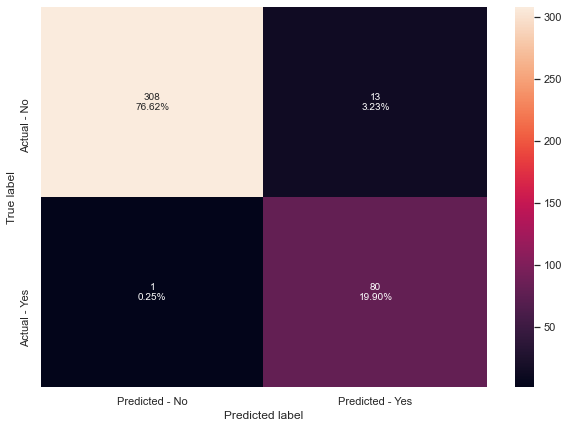

   age  bmi  children  charges  sex_female  sex_male  region_northeast  \
0   18   16         0     1121           0         1                 1   

   region_northwest  region_southeast  region_southwest  
0                 0                 0                 0  
[0]


In [656]:
make_confusion_matrix(xgb_tuned,yc_test)

In [36]:
!pip install gradio

  Using cached https://files.pythonhosted.org/packages/e4/c6/19d6941437fb56db775b00c0181af81e539c42369bc79c664001d2272ccb/gradio-2.0.5-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/db/84/901e700de86604b1c4ef4b57110d4e947c218b9997adf5d38fa7da493bce/Flask_Cors-3.0.10-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/74/47/f3e1fedfaad965c81c2f17234636d72f71450f1b4522ca26d2b7eb4a0a74/Flask-CacheBuster-1.0.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/30/81/2f447982f8d5dec5b56c10ca9ac53e5de2b2e9e2bdf7e091a05731f21379/analytics_python-1.3.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/88/7f/740b99ffb8173ba9d20eb890cc05187677df90219649645aca7e44eb8ff4/pycryptodome-3.10.1.tar.gz
    Complete output from command python setup.py egg_info:
    Testing support for clang
    Traceback (most recent call last):
      File "C:\Users\meeranibu\.conda\envs\tfdeeplearning\lib\site-packages\setuptools\msvc

Command "python setup.py egg_info" failed with error code 1 in C:\Users\MEERAN~1\AppData\Local\Temp\pip-install-fcqmfv51\pycryptodome\
You are using pip version 10.0.1, however version 20.3.4 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [145]:
face = gr.Interface(fn=start, inputs="text", outputs="text")
face.launch()

Running locally at: http://127.0.0.1:7861/
To create a public link, set `share=True` in `launch()`.
Interface loading below...


(<Flask 'gradio.networking'>, 'http://127.0.0.1:7861/', None)

In [146]:
import gradio as gr
def start(name, morning_is, temp):
            msg = "Good morning" if morning_is else "Good evening"
            greeting = "%s %s. It is %s degrees today" % (msg, name, temp)
            cels = (temp - 32) * 5 / 9
            return greeting, round(cels, 2)

In [147]:
face = gr.Interface(fn=start, inputs=["text", "checkbox", gr.inputs.Slider(0, 100)], outputs=["text", "number"])
face.launch()

Running locally at: http://127.0.0.1:7862/
To create a public link, set `share=True` in `launch()`.
Interface loading below...


(<Flask 'gradio.networking'>, 'http://127.0.0.1:7862/', None)

In [196]:
age=5
bmi=12
children=3
sex_male=0
sex_female=0
NE=0
NW=0
SE=0
SW=0  
sm_y=0
sm_n=0
inp=pd.DataFrame({'Age':[age],'BMI':[bmi],'Children':[children],'SEXF':[sex_female],'SEXM':[sex_male],'SMOKERN':[sm_n],'SMOKERY':[sm_y],'NE':[NE],'NW':[NW],'SE':[SE],'SW':[SW]})
inp.head()

,Age,BMI,Children,SEXF,SEXM,SMOKERN,SMOKERY,NE,NW,SE,SW
0,5,12,3,0,0,0,0,0,0,0,0


In [46]:
import gradio as gr
def med_chg(age,bmi,children,sex,smoker,region):

    sex_male=0
    sex_female=0
    NE=0
    NW=0
    SE=0
    SW=0  
    sm_y=0
    sm_n=0    
    if sex=='Male':
        sex_male=1
    else:
        sex_female=1
    if smoker=='Yes':
        sm_y=1
    else:
        sm_n=1
    if region=='NE':
        NE=1
    elif region=='NW':
        NW=1
    elif region=='SE':
        SE=1
    else:
        SW=1       
   
    inp=pd.DataFrame({'age':[age],'bmi':[bmi],'children':[children],'sex_female':[sex_female],'sex_male':[sex_male],'smoker_no':[sm_n],'smoker_yes':[sm_y],'region_northeast':[NE],'region_northwest':[NW],'region_southeast':[SE],'region_southwest':[SW]})
    
    Predicted_Claim=rf_tuned.predict(inp).tolist()
    Actual_Claim=9999
    X_rnd=X.copy()
    X_rnd['bmi']=round(X_rnd['bmi'],1)
  
    for i in range(len(X_rnd)):     
        if ((X_rnd.iloc[i,0]==inp.iloc[0,0])&(X_rnd.iloc[i,1]==inp.iloc[0,1])&(X_rnd.iloc[i,2]==inp.iloc[0,2])&(X_rnd.iloc[i,3]==inp.iloc[0,3])&(X_rnd.iloc[i,4]==inp.iloc[0,4])
            &(X_rnd.iloc[i,5]==inp.iloc[0,5])&(X_rnd.iloc[i,6]==inp.iloc[0,6])&(X_rnd.iloc[i,7]==inp.iloc[0,7])&(X_rnd.iloc[i,8]==inp.iloc[0,8])&(X_rnd.iloc[i,9]==inp.iloc[0,9])
            &(X_rnd.iloc[i,10]==inp.iloc[0,10])):
            Actual_Claim=y.iloc[i,0]    
                  
# if X_rnd.iloc[[i]].values.all==inp.iloc[[0]].values.all:                      
    
    
    return round(Predicted_Claim[0],2),round(Actual_Claim,2) 
            
#             msg = "Good morning" if morning_is else "Good evening"
#             greeting = "%s %s. It is %s degrees today" % (msg, name, temp)
            

In [648]:
pred_test

array([ 3488.34839931, 13174.54438468, 10197.20415665, 10712.06802224,
        3762.73029471, 38527.35986169, 10617.04488332, 13187.32749859,
        5649.24449332, 19938.29167865, 13953.97672673, 14279.83925471,
        6970.37900852,  7131.15039445,  3358.29776461, 10684.32434737,
        5885.23631885,  6665.08874182, 14054.70287141, 13941.79936298,
       12103.54713521, 39181.52098163,  8956.68094252, 10345.89553189,
        3515.81352999,  7121.02711691,  8399.14360457, 10049.58064912,
        6551.41278012,  6099.39790168, 13358.43307084,  6572.57767928,
       23693.51556444, 35933.63016856, 24732.70891766, 12931.47303482,
       38710.72817778, 18188.00836321, 13351.89294178, 46175.74763541,
        6548.532061  , 13204.51052537, 11061.21299788, 13983.12988276,
        6455.30151712, 13861.17759543,  3719.47521902, 35957.33089036,
       10803.6138268 , 18319.7760807 , 14006.38155072, 14190.08447913,
        4189.63028261,  9078.94115497, 17927.59919612,  5689.13025597,
      

In [52]:
face = gr.Interface(fn=med_chg, inputs=[gr.inputs.Slider(minimum=18,maximum=64,step=1),gr.inputs.Slider(16,53),gr.inputs.Slider(minimum=0,maximum=5,step=1),gr.inputs.Radio(["Male","Female"]),gr.inputs.Radio(["Yes", "No"]),gr.inputs.Radio(["NE", "NW","SE", "SW"])],outputs=[gr.outputs.Textbox(type="number", label='Predicted Claim'),gr.outputs.Textbox(type="number", label='Actual Claim')])
# face = gr.Interface(fn=med_chg, inputs=["text", "checkbox", gr.inputs.Slider(0, 100)], outputs=["text", "number"])
face.launch()

Running locally at: http://127.0.0.1:7865/
To create a public link, set `share=True` in `launch()`.
Interface loading below...


(<Flask 'gradio.networking'>, 'http://127.0.0.1:7865/', None)

In [48]:
import gradio as gr
def chk_smk(age,bmi,children,sex,region,charges):

    sex_male=0
    sex_female=0
    NE=0
    NW=0
    SE=0
    SW=0  
    pred_smk='No'
    actual_smk='unknown'
    if sex=='Male':
        sex_male=1
    else:
        sex_female=1
    
    if region=='NE':
        NE=1
    elif region=='NW':
        NW=1
    elif region=='SE':
        SE=1
    else:
        SW=1       
   
    inp=pd.DataFrame({'age':[age],'bmi':[bmi],'children':[children],'charges':[charges],'sex_female':[sex_female],'sex_male':[sex_male],'region_northeast':[NE],'region_northwest':[NW],'region_southeast':[SE],'region_southwest':[SW]})
    print (inp)
    print (estimator.predict(inp).tolist())
    if estimator.predict(inp).tolist()==[1]:
        pred_smk='Yes'            
    
    
    X_rnd=Xc.copy()
    X_rnd['bmi']=round(X_rnd['bmi'],1)
    X_rnd['charges']=round(X_rnd['charges'],0)    
  
    for i in range(len(X_rnd)):     
        if ((X_rnd.iloc[i,0]==inp.iloc[0,0])&(X_rnd.iloc[i,1]==inp.iloc[0,1])&(X_rnd.iloc[i,2]==inp.iloc[0,2])&(X_rnd.iloc[i,3]==inp.iloc[0,3])&(X_rnd.iloc[i,4]==inp.iloc[0,4])
            &(X_rnd.iloc[i,5]==inp.iloc[0,5])&(X_rnd.iloc[i,6]==inp.iloc[0,6])&(X_rnd.iloc[i,7]==inp.iloc[0,7])&(X_rnd.iloc[i,8]==inp.iloc[0,8])&(X_rnd.iloc[i,9]==inp.iloc[0,9])
            ):
            if yc.iloc[i,0]==1:
                print (i)
                actual_smk='Yes'
            else:
                actual_smk='No'
                
    
    
    
    return pred_smk,actual_smk
            
#             msg = "Good morning" if morning_is else "Good evening"
#             greeting = "%s %s. It is %s degrees today" % (msg, name, temp)
            

In [633]:
 estimator.predict(Xc_test[Xc['charges']==21984.47061])
# Xc_test.iloc[3]

<ipython-input-633-13bf70226202>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  estimator.predict(Xc_test[Xc['charges']==21984.47061])


array([1], dtype=int64)

   age   bmi  children  charges  sex_female  sex_male  region_northeast  \
0   32  28.9         0     3867           0         1                 0   

   region_northwest  region_southeast  region_southwest  
0                 1                 0                 0  
[0]


[2021-06-07 19:48:06,027] ERROR in app: Exception on /api/predict/ [POST]
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask_cors\extension.py", line 165, in wrapped_function
    return cors_after_request(app.make_response(f(*args, **kwargs)))
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.

   age   bmi  children charges  sex_female  sex_male  region_northeast  \
0   45  21.2         0      NE           0         1                 0   

   region_northwest  region_southeast  region_southwest  
0                 0                 0                 1  


[2021-06-07 19:48:30,607] ERROR in app: Exception on /api/predict/ [POST]
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask_cors\extension.py", line 165, in wrapped_function
    return cors_after_request(app.make_response(f(*args, **kwargs)))
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.

   age  bmi  children charges  sex_female  sex_male  region_northeast  \
0   18   16         0      NE           0         1                 0   

   region_northwest  region_southeast  region_southwest  
0                 0                 0                 1  


In [608]:
predc_test = estimator.predict(Xc_test)
yc_test_arr=yc_test.to_numpy()
for i in range(len(yc_test)):
    if ((yc_test_arr[i]==1)&(predc_test[i]==1)):
        print(i)
    

5
9
21
32
33
34
36
37
39
47
54
56
62
69
70
71
75
84
85
87
90
91
101
102
103
104
105
124
127
128
130
133
142
161
166
172
173
185
191
211
215
217
219
221
228
232
236
245
256
257
259
263
264
265
275
278
279
295
305
312
329
340
342
345
353
354
357
366
367
369
370
381
382
383
390
391
393
394
395
400


In [53]:
face = gr.Interface(fn=chk_smk, inputs=[gr.inputs.Slider(minimum=18,maximum=64,step=1),gr.inputs.Slider(16,53),gr.inputs.Slider(minimum=0,maximum=5,step=1),gr.inputs.Radio(["Male","Female"]),gr.inputs.Radio(["NE", "NW","SE", "SW"]),gr.inputs.Slider(minimum=1121,maximum=63770,step=1)],outputs=[gr.outputs.Textbox(type="str", label='Predicted Smoker'),gr.outputs.Textbox(type="str", label='Actual Smoker')])
# face = gr.Interface(fn=med_chg, inputs=["text", "checkbox", gr.inputs.Slider(0, 100)], outputs=["text", "number"])
face.launch()

Running locally at: http://127.0.0.1:7866/
To create a public link, set `share=True` in `launch()`.
Interface loading below...


(<Flask 'gradio.networking'>, 'http://127.0.0.1:7866/', None)

   age   bmi  children  charges  sex_female  sex_male  region_northeast  \
0   62  26.3         0    27809           1         0                 0   

   region_northwest  region_southeast  region_southwest  
0                 0                 1                 0  
[1]
11
   age   bmi  children  charges  sex_female  sex_male  region_northeast  \
0   62  18.1         0     6721           1         0                 0   

   region_northwest  region_southeast  region_southwest  
0                 0                 1                 0  
[0]


In [ ]:
# tensorflow

In [2]:
!pip install tensorflow


  Using cached tensorflow-2.5.0-cp38-cp38-win_amd64.whl (422.6 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorboard-2.5.0-py3-none-any.whl (6.0 MB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Using cached google_auth_oauthlib-0.4.4-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached tensorboard_plugin_wit-1.8.0-py3-none-any.whl (781 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-n


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\six-1.16.0.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.



In [5]:
!pip install tensorflow


  Using cached tensorflow-2.5.0-cp38-cp38-win_amd64.whl (422.6 MB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl (13.3 MB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard-2.5.0-py3-none-any.whl (6.0 MB)
  Using cached absl_py-0.13.0-py3-none-any.whl (132 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cach

Error processing line 1 of C:\ProgramData\Anaconda3\lib\site-packages\protobuf-3.17.3-nspkg.pth:

  Traceback (most recent call last):
    File "C:\ProgramData\Anaconda3\lib\site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 553, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\six-1.16.0.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.



In [11]:
import tensorflow as tf

In [4]:

print(tf.__version__)
# print(dir(tf.feature_column))

1.10.0


In [12]:
age = tf.feature_column.numeric_column("age")
bmi= tf.feature_column.numeric_column("bmi")
children = tf.feature_column.numeric_column("children")

In [20]:
X_train1['region'].value_counts()


NameError: name 'X_train1' is not defined

In [13]:
# tf.feature_column.categorical_column_with_hash_bucket("occupation", hash_bucket_size=1000)
sex = tf.feature_column.categorical_column_with_hash_bucket("sex",hash_bucket_size=100)
smoker = tf.feature_column.categorical_column_with_hash_bucket("smoker",hash_bucket_size=100)
# sex= tf.feature_column.categorical_column_with_vocabulary_list(key='sex',vocabulary_list= ["female", "male"])
# smoker= tf.feature_column.categorical_column_with_vocabulary_list(key='smoker',vocabulary_list= ["yes", "no"])
# region= tf.feature_column.categorical_column_with_vocabulary_list(key='region',vocabulary_list= ["northeast","southeast","northwest","southwest"])
region = tf.feature_column.categorical_column_with_hash_bucket("region",hash_bucket_size=100)

In [14]:
embedded_sex = tf.feature_column.embedding_column(sex, dimension=2)
embedded_smoker = tf.feature_column.embedding_column(smoker, dimension=2)
embedded_region = tf.feature_column.embedding_column(region, dimension=4)
feat_cols =[age,embedded_sex,bmi,children,embedded_smoker,embedded_region]

In [15]:
feat_cols =[age,embedded_sex,bmi,children,embedded_smoker,embedded_region]
# feat_cols =[age,sex,bmi,children,smoker,region]
# feat_cols =[age,bmi,children,sex]

In [289]:
model=tf.estimator.DNNRegressor(hidden_units=[6,6,6,6],feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\MEERAN~1\\AppData\\Local\\Temp\\tmpbbo7ecxf', '_train_distribute': None, '_num_ps_replicas': 0, '_log_step_count_steps': 100, '_evaluation_master': '', '_global_id_in_cluster': 0, '_task_type': 'worker', '_tf_random_seed': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000027CAA26F630>, '_task_id': 0, '_service': None, '_save_summary_steps': 100, '_device_fn': None, '_is_chief': True, '_master': '', '_save_checkpoints_steps': None, '_num_worker_replicas': 1}


In [365]:
!pip install tensorboard

mkl-random 1.0.1 requires cython, which is not installed.
tensorflow 1.10.0 has requirement numpy<=1.14.5,>=1.13.3, but you'll have numpy 1.15.2 which is incompatible.
tensorflow 1.10.0 has requirement setuptools<=39.1.0, but you'll have setuptools 40.2.0 which is incompatible.
You are using pip version 10.0.1, however version 20.3.4 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [222]:
input_func=tf.estimator.inputs.pandas_input_fn(x=X_train1,y=y_train,batch_size=100,num_epochs=None,shuffle=True)
# input_func=tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=100,num_epochs=None,shuffle=True)

In [223]:
# model =  tf.estimator.LinearRegressor(feature_columns=feat_cols,model_dir='logs6')
model =  tf.estimator.DNNRegressor(hidden_units=[6,6,6,6],feature_columns=feat_cols,model_dir='logs30')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002344315D9B0>, '_is_chief': True, '_save_checkpoints_steps': None, '_save_summary_steps': 100, '_evaluation_master': '', '_session_config': None, '_num_worker_replicas': 1, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_master': '', '_device_fn': None, '_tf_random_seed': None, '_service': None, '_log_step_count_steps': 100, '_keep_checkpoint_max': 5, '_task_id': 0, '_num_ps_replicas': 0, '_model_dir': 'logs30', '_train_distribute': None, '_task_type': 'worker', '_global_id_in_cluster': 0}


In [333]:
!pip install tensorboard

mkl-random 1.0.1 requires cython, which is not installed.
tensorflow 1.10.0 has requirement numpy<=1.14.5,>=1.13.3, but you'll have numpy 1.15.2 which is incompatible.
tensorflow 1.10.0 has requirement setuptools<=39.1.0, but you'll have setuptools 40.2.0 which is incompatible.
You are using pip version 10.0.1, however version 20.3.4 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
from platform import python_version
print(python_version())

3.5.4


In [224]:
model.train(input_fn=input_func,steps=51000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into logs30\model.ckpt.
INFO:tensorflow:loss = 30613807000.0, step = 1
INFO:tensorflow:global_step/sec: 50.15
INFO:tensorflow:loss = 16196332000.0, step = 101 (1.995 sec)
INFO:tensorflow:global_step/sec: 111.982
INFO:tensorflow:loss = 9453815000.0, step = 201 (0.892 sec)
INFO:tensorflow:global_step/sec: 104.602
INFO:tensorflow:loss = 8175189000.0, step = 301 (0.957 sec)
INFO:tensorflow:global_step/sec: 120.338
INFO:tensorflow:loss = 4930089500.0, step = 401 (0.832 sec)
INFO:tensorflow:global_step/sec: 116.822
INFO:tensorflow:loss = 2957488600.0, step = 501 (0.853 sec)
INFO:tensorflow:global_step/sec: 122.699
INFO:tensorflow:loss = 3183491800.0, step = 601 (0.816 sec)
INFO:tensorflow:global_step/sec: 119.048
INFO:

INFO:tensorflow:loss = 4904923000.0, step = 7801 (0.824 sec)
INFO:tensorflow:global_step/sec: 122.704
INFO:tensorflow:loss = 2380712400.0, step = 7901 (0.813 sec)
INFO:tensorflow:global_step/sec: 119.756
INFO:tensorflow:loss = 3623659000.0, step = 8001 (0.834 sec)
INFO:tensorflow:global_step/sec: 119.479
INFO:tensorflow:loss = 2954317800.0, step = 8101 (0.839 sec)
INFO:tensorflow:global_step/sec: 108.93
INFO:tensorflow:loss = 2702887000.0, step = 8201 (0.917 sec)
INFO:tensorflow:global_step/sec: 116.282
INFO:tensorflow:loss = 3209561600.0, step = 8301 (0.860 sec)
INFO:tensorflow:global_step/sec: 119.327
INFO:tensorflow:loss = 3184429600.0, step = 8401 (0.840 sec)
INFO:tensorflow:global_step/sec: 111.11
INFO:tensorflow:loss = 2876313000.0, step = 8501 (0.900 sec)
INFO:tensorflow:global_step/sec: 108.696
INFO:tensorflow:loss = 4164613400.0, step = 8601 (0.922 sec)
INFO:tensorflow:global_step/sec: 120.048
INFO:tensorflow:loss = 3672108000.0, step = 8701 (0.831 sec)
INFO:tensorflow:global_

INFO:tensorflow:loss = 3348723700.0, step = 15801 (0.825 sec)
INFO:tensorflow:global_step/sec: 111.607
INFO:tensorflow:loss = 2602017500.0, step = 15901 (0.902 sec)
INFO:tensorflow:global_step/sec: 111.611
INFO:tensorflow:loss = 2721905700.0, step = 16001 (0.893 sec)
INFO:tensorflow:global_step/sec: 112.108
INFO:tensorflow:loss = 4151292200.0, step = 16101 (0.891 sec)
INFO:tensorflow:global_step/sec: 107.527
INFO:tensorflow:loss = 3930151400.0, step = 16201 (0.926 sec)
INFO:tensorflow:global_step/sec: 121.65
INFO:tensorflow:loss = 3185004000.0, step = 16301 (0.824 sec)
INFO:tensorflow:global_step/sec: 116.413
INFO:tensorflow:loss = 3008562200.0, step = 16401 (0.858 sec)
INFO:tensorflow:global_step/sec: 121.509
INFO:tensorflow:loss = 4238529000.0, step = 16501 (0.823 sec)
INFO:tensorflow:global_step/sec: 116.283
INFO:tensorflow:loss = 2637911000.0, step = 16601 (0.862 sec)
INFO:tensorflow:global_step/sec: 119.756
INFO:tensorflow:loss = 3113045000.0, step = 16701 (0.835 sec)
INFO:tensorf

INFO:tensorflow:loss = 2488495600.0, step = 23801 (0.830 sec)
INFO:tensorflow:global_step/sec: 117.367
INFO:tensorflow:loss = 2060955800.0, step = 23901 (0.855 sec)
INFO:tensorflow:global_step/sec: 119.618
INFO:tensorflow:loss = 2227785000.0, step = 24001 (0.838 sec)
INFO:tensorflow:global_step/sec: 117.924
INFO:tensorflow:loss = 2977172000.0, step = 24101 (0.846 sec)
INFO:tensorflow:global_step/sec: 113.122
INFO:tensorflow:loss = 2000623100.0, step = 24201 (0.886 sec)
INFO:tensorflow:global_step/sec: 116.415
INFO:tensorflow:loss = 2468743200.0, step = 24301 (0.857 sec)
INFO:tensorflow:global_step/sec: 116.55
INFO:tensorflow:loss = 2430308900.0, step = 24401 (0.856 sec)
INFO:tensorflow:global_step/sec: 117.234
INFO:tensorflow:loss = 2511109000.0, step = 24501 (0.853 sec)
INFO:tensorflow:global_step/sec: 118.905
INFO:tensorflow:loss = 2747109400.0, step = 24601 (0.843 sec)
INFO:tensorflow:global_step/sec: 121.217
INFO:tensorflow:loss = 1504760800.0, step = 24701 (0.826 sec)
INFO:tensorf

INFO:tensorflow:loss = 2079696900.0, step = 31801 (0.861 sec)
INFO:tensorflow:global_step/sec: 113.101
INFO:tensorflow:loss = 3568773600.0, step = 31901 (0.884 sec)
INFO:tensorflow:global_step/sec: 119.76
INFO:tensorflow:loss = 3063275300.0, step = 32001 (0.838 sec)
INFO:tensorflow:global_step/sec: 121.951
INFO:tensorflow:loss = 3202577400.0, step = 32101 (0.819 sec)
INFO:tensorflow:global_step/sec: 112.233
INFO:tensorflow:loss = 3224507000.0, step = 32201 (0.890 sec)
INFO:tensorflow:global_step/sec: 112.237
INFO:tensorflow:loss = 3097007900.0, step = 32301 (0.891 sec)
INFO:tensorflow:global_step/sec: 119.9
INFO:tensorflow:loss = 2404282000.0, step = 32401 (0.835 sec)
INFO:tensorflow:global_step/sec: 117.233
INFO:tensorflow:loss = 1471800700.0, step = 32501 (0.851 sec)
INFO:tensorflow:global_step/sec: 118.624
INFO:tensorflow:loss = 2877099500.0, step = 32601 (0.843 sec)
INFO:tensorflow:global_step/sec: 120.482
INFO:tensorflow:loss = 2357590000.0, step = 32701 (0.831 sec)
INFO:tensorflo

INFO:tensorflow:loss = 3346134000.0, step = 39801 (0.844 sec)
INFO:tensorflow:global_step/sec: 118.063
INFO:tensorflow:loss = 3555265000.0, step = 39901 (0.848 sec)
INFO:tensorflow:global_step/sec: 119.479
INFO:tensorflow:loss = 2062633500.0, step = 40001 (0.838 sec)
INFO:tensorflow:global_step/sec: 116.546
INFO:tensorflow:loss = 1967861600.0, step = 40101 (0.858 sec)
INFO:tensorflow:global_step/sec: 113.769
INFO:tensorflow:loss = 1899741600.0, step = 40201 (0.879 sec)
INFO:tensorflow:global_step/sec: 112.612
INFO:tensorflow:loss = 3192842500.0, step = 40301 (0.887 sec)
INFO:tensorflow:global_step/sec: 110.133
INFO:tensorflow:loss = 2200201700.0, step = 40401 (0.908 sec)
INFO:tensorflow:global_step/sec: 118.059
INFO:tensorflow:loss = 2849857500.0, step = 40501 (0.845 sec)
INFO:tensorflow:global_step/sec: 120.193
INFO:tensorflow:loss = 1549622700.0, step = 40601 (0.834 sec)
INFO:tensorflow:global_step/sec: 120.052
INFO:tensorflow:loss = 2790953000.0, step = 40701 (0.834 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 121.359
INFO:tensorflow:loss = 2238734800.0, step = 47801 (0.823 sec)
INFO:tensorflow:global_step/sec: 119.044
INFO:tensorflow:loss = 723256000.0, step = 47901 (0.841 sec)
INFO:tensorflow:global_step/sec: 122.104
INFO:tensorflow:loss = 2196860200.0, step = 48001 (0.820 sec)
INFO:tensorflow:global_step/sec: 118.338
INFO:tensorflow:loss = 2785181200.0, step = 48101 (0.844 sec)
INFO:tensorflow:global_step/sec: 115.608
INFO:tensorflow:loss = 1949128400.0, step = 48201 (0.865 sec)
INFO:tensorflow:global_step/sec: 110.132
INFO:tensorflow:loss = 2488676400.0, step = 48301 (0.907 sec)
INFO:tensorflow:global_step/sec: 120.773
INFO:tensorflow:loss = 2441304300.0, step = 48401 (0.829 sec)
INFO:tensorflow:global_step/sec: 119.048
INFO:tensorflow:loss = 1912473300.0, step = 48501 (0.837 sec)
INFO:tensorflow:global_step/sec: 119.189
INFO:tensorflow:loss = 1717146900.0, step = 48601 (0.843 sec)
INFO:tensorflow:global_step/sec: 119.052
INFO:tensorflow:loss = 2105093100

In [15]:
log_folder = 'logs'

In [ ]:
!tensorboard --logdir=C:\Users\meeranibu\Downloads

In [17]:
import datetime
log_folder = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [164]:
X_test1=X_test.copy()

In [284]:
len(X_test1)

402

In [165]:
X_test1=X_test1.drop(['smoker','region','sex'], axis=1)

In [225]:
predict_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test1,
      batch_size=len(X_test1),
#       num_epochs=1,
      shuffle=False)

In [226]:
pred_gen = model.predict(predict_input_func)

In [227]:
predictions = list(pred_gen)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from logs30\model.ckpt-51000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [228]:
final_preds = []
for pred in predictions:
    final_preds.append(pred['predictions'])

In [151]:
from sklearn.metrics import mean_squared_error

In [229]:
mean_squared_error(y_test,final_preds)**0.5

4479.766310046201

In [231]:
test_r2=metrics.r2_score(y_test,final_preds)

In [232]:
print (test_r2)

0.8571418710882625


In [301]:
y_test

44       6079.67150
134      2457.21115
980     25517.11363
618     34439.85590
1238     6985.50695
295      1704.56810
20      13228.84695
1297     4340.44090
365      9778.34720
670      4837.58230
1210     5373.36425
284      9625.92000
1083     4076.49700
115     30259.99556
793     21195.81800
252     44260.74990
986      8410.04685
869      4391.65200
18      10602.38500
45      20630.28351
1040    20234.85475
688     26236.57997
782      9386.16130
1191    13725.47184
1041     1704.70015
0       16884.92400
1125    14254.60820
1120    34166.27300
674     46200.98510
1108     2904.08800
           ...     
74       7726.85400
287     14256.19280
237      4463.20510
888      1682.59700
1104    20420.60465
729      6781.35420
932     10096.97000
55      47496.49445
460     10381.47870
734     14007.22200
1033    13747.87235
693      2352.96845
271     42856.83800
812     11013.71190
1314    18765.87545
998      6551.75010
821      2680.94930
336     12142.57860
1279     4189.11310


In [302]:
final_preds

[array([8831.36], dtype=float32),
 array([3327.0596], dtype=float32),
 array([12540.763], dtype=float32),
 array([30318.479], dtype=float32),
 array([9088.946], dtype=float32),
 array([2518.3071], dtype=float32),
 array([14059.082], dtype=float32),
 array([5892.5586], dtype=float32),
 array([11501.111], dtype=float32),
 array([7141.605], dtype=float32),
 array([7806.7803], dtype=float32),
 array([10316.255], dtype=float32),
 array([5661.2524], dtype=float32),
 array([13684.692], dtype=float32),
 array([18207.967], dtype=float32),
 array([39218.727], dtype=float32),
 array([10778.541], dtype=float32),
 array([4727.961], dtype=float32),
 array([11735.14], dtype=float32),
 array([11337.128], dtype=float32),
 array([27742.854], dtype=float32),
 array([9259.572], dtype=float32),
 array([11695.771], dtype=float32),
 array([8985.171], dtype=float32),
 array([2523.12], dtype=float32),
 array([23947.258], dtype=float32),
 array([14138.131], dtype=float32),
 array([30215.598], dtype=float32),
 a

In [484]:
tf.logging.set_verbosity(tf.logging.INFO)

In [99]:
final_preds

[array([6738.5127], dtype=float32),
 array([5571.672], dtype=float32),
 array([12267.263], dtype=float32),
 array([30189.67], dtype=float32),
 array([7352.6675], dtype=float32),
 array([4188.0825], dtype=float32),
 array([14367.969], dtype=float32),
 array([6378.875], dtype=float32),
 array([11424.047], dtype=float32),
 array([6811.506], dtype=float32),
 array([5907.5044], dtype=float32),
 array([10868.446], dtype=float32),
 array([4721.955], dtype=float32),
 array([14188.396], dtype=float32),
 array([19929.844], dtype=float32),
 array([38796.64], dtype=float32),
 array([10751.913], dtype=float32),
 array([4439.9604], dtype=float32),
 array([11674.3955], dtype=float32),
 array([11391.249], dtype=float32),
 array([27904.258], dtype=float32),
 array([7341.584], dtype=float32),
 array([11708.614], dtype=float32),
 array([6619.2754], dtype=float32),
 array([4196.884], dtype=float32),
 array([23869.57], dtype=float32),
 array([15727.548], dtype=float32),
 array([30427.002], dtype=float32),


In [46]:
model.score(X_test1, y_test)

AttributeError: 'LinearRegressor' object has no attribute 'score'

In [322]:
dataset1 = pd.DataFrame(final_preds)

In [323]:
dataset2 = pd.DataFrame(y_test)

In [309]:
dataset2

,charges
44,6079.67150
134,2457.21115
980,25517.11363
618,34439.85590
1238,6985.50695
295,1704.56810
20,13228.84695
1297,4340.44090
365,9778.34720
670,4837.58230


In [330]:
# function for combined boxplot and histplot
def histogram_boxplot(feature, figsize=(10,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

C:\ProgramData\Anaconda3\envs\tfdeeplearning1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


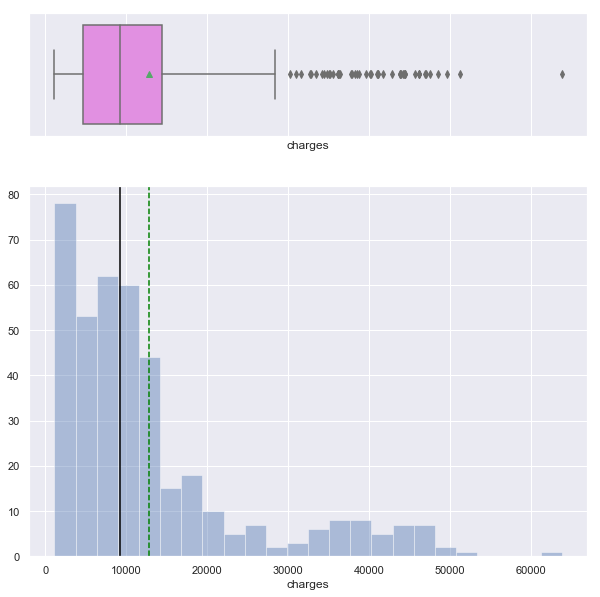

In [331]:
histogram_boxplot(dataset2['charges'])

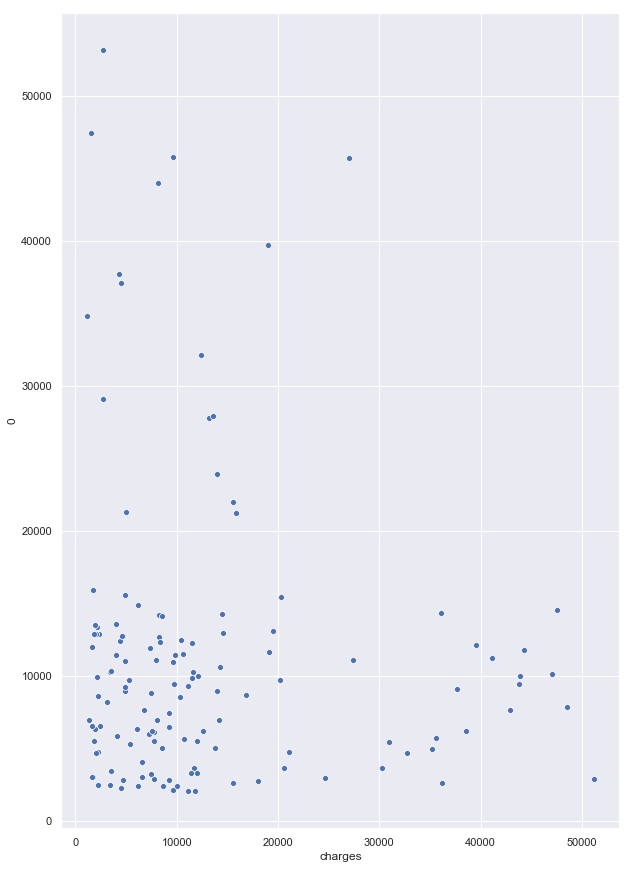

In [332]:
plt.figure(figsize=(10,15))
sns.scatterplot(dataset2['charges'],dataset1[0]);
plt.show()

19    26
18    16
55    12
48    12
53    12
41    12
46    11
49    11
38    10
23    10
51    10
42    10
26     9
28     9
33     9
57     9
45     9
64     9
60     9
47     8
52     8
20     8
24     8
25     8
35     8
32     8
58     8
44     8
43     8
59     7
36     7
40     7
21     7
56     7
50     7
62     6
54     6
29     6
30     6
31     6
61     6
63     6
27     5
22     5
34     5
37     4
39     4
Name: age, dtype: int64

In [233]:
predict_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_train1,
      batch_size=len(X_train1),
#       num_epochs=1,
      shuffle=False)

In [234]:
pred_gen = model.predict(predict_input_func)

In [235]:
predictions = list(pred_gen)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from logs30\model.ckpt-51000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [236]:
final_preds = []
for pred in predictions:
    final_preds.append(pred['predictions'])

In [106]:
from sklearn.metrics import mean_squared_error

In [237]:
mean_squared_error(y_train,final_preds)**0.5

4647.237139146172

In [238]:
train_r2=metrics.r2_score(y_train,final_preds)

In [239]:
print(train_r2)

0.8550777997859363


In [335]:
!pip install tensorboard

mkl-random 1.0.1 requires cython, which is not installed.
tensorflow 1.10.0 has requirement numpy<=1.14.5,>=1.13.3, but you'll have numpy 1.15.2 which is incompatible.
tensorflow 1.10.0 has requirement setuptools<=39.1.0, but you'll have setuptools 40.2.0 which is incompatible.
You are using pip version 10.0.1, however version 20.3.4 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [334]:
which tensorboard

SyntaxError: invalid syntax (<ipython-input-334-49584edba7e0>, line 1)

In [474]:
import datetime, os

logs_base_dir = "./logs"
os.makedirs(logs_base_dir, exist_ok=True)
%tensorboard --logdir {logs_base_dir}

UsageError: Line magic function `%tensorboard` not found.


In [150]:
data_mlc=data.copy()

In [151]:
def find_smoker(val):
    if val=='yes':
        val=1
    else:
        val=0 
    return val
data_mlc['smoker'] = data_mlc['smoker'].apply(find_smoker)

In [152]:
x_data2 = data_mlc.drop('smoker',axis=1)
y_labels2 = data_mlc['smoker']
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_data2,y_labels2,test_size=0.3,random_state=101)

In [153]:
age = tf.feature_column.numeric_column("age")
bmi= tf.feature_column.numeric_column("bmi")
children = tf.feature_column.numeric_column("children")
charges = tf.feature_column.numeric_column("charges")

In [154]:
# tf.feature_column.categorical_column_with_hash_bucket("occupation", hash_bucket_size=1000)
sex = tf.feature_column.categorical_column_with_hash_bucket("sex",hash_bucket_size=100)
# smoker = tf.feature_column.categorical_column_with_hash_bucket("smoker",hash_bucket_size=100)
# sex= tf.feature_column.categorical_column_with_vocabulary_list(key='sex',vocabulary_list= ["female", "male"])
# smoker= tf.feature_column.categorical_column_with_vocabulary_list(key='smoker',vocabulary_list= ["yes", "no"])
# region= tf.feature_column.categorical_column_with_vocabulary_list(key='region',vocabulary_list= ["northeast","southeast","northwest","southwest"])
region = tf.feature_column.categorical_column_with_hash_bucket("region",hash_bucket_size=100)

In [367]:
!pip install jupyter-tensorboard

mkl-random 1.0.1 requires cython, which is not installed.
tensorflow 1.10.0 has requirement numpy<=1.14.5,>=1.13.3, but you'll have numpy 1.15.2 which is incompatible.
tensorflow 1.10.0 has requirement setuptools<=39.1.0, but you'll have setuptools 40.2.0 which is incompatible.
You are using pip version 10.0.1, however version 20.3.4 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [155]:
embedded_sex = tf.feature_column.embedding_column(sex, dimension=2)
# embedded_smoker = tf.feature_column.embedding_column(smoker, dimension=2)
embedded_region = tf.feature_column.embedding_column(region, dimension=4)
feat_cols =[age,embedded_sex,bmi,children,embedded_region,charges]

In [5]:
# feat_cols =[age,embedded_sex,bmi,children,embedded_smoker,embedded_region]
# feat_cols =[age,sex,bmi,children,smoker,region]
# feat_cols =[age,bmi,children,sex]

In [156]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train2,y=y_train2,batch_size=936,num_epochs=None,shuffle=True)

In [182]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)
# model = tf.estimator.DNNClassifier(hidden_units=[6,6,6],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\MEERAN~1\\AppData\\Local\\Temp\\tmpcz9r1lp7', '_train_distribute': None, '_num_ps_replicas': 0, '_log_step_count_steps': 100, '_evaluation_master': '', '_global_id_in_cluster': 0, '_task_type': 'worker', '_tf_random_seed': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000027CA47F3860>, '_task_id': 0, '_service': None, '_save_summary_steps': 100, '_device_fn': None, '_is_chief': True, '_master': '', '_save_checkpoints_steps': None, '_num_worker_replicas': 1}


In [222]:
model.train(input_fn=input_func,steps=100000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\MEERAN~1\AppData\Local\Temp\tmpcz9r1lp7\model.ckpt-155000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 155000 into C:\Users\MEERAN~1\AppData\Local\Temp\tmpcz9r1lp7\model.ckpt.
INFO:tensorflow:loss = 267.93268, step = 155001
INFO:tensorflow:global_step/sec: 34.6011
INFO:tensorflow:loss = 143.0463, step = 155101 (2.890 sec)
INFO:tensorflow:global_step/sec: 36.4472
INFO:tensorflow:loss = 193.93727, step = 155201 (2.756 sec)
INFO:tensorflow:global_step/sec: 38.5035
INFO:tensorflow:loss = 325.9206, step = 155301 (2.589 sec)
INFO:tensorflow:global_step/sec: 38.4467
INFO:tensorflow:loss = 221.06194, step = 155401 (2.601 sec)
INFO:tensorflow:global_step/sec: 38.2122
INFO:tensorflow:loss = 223.57697, step = 155501 (2.

KeyboardInterrupt: 

In [214]:
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_train2,batch_size=len(X_train2),shuffle=False)

In [215]:
predictions = list(model.predict(input_fn=pred_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\MEERAN~1\AppData\Local\Temp\tmpcz9r1lp7\model.ckpt-155000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [216]:
final_preds = []
for pred in predictions:
    final_preds.append(pred['class_ids'][0])

In [188]:
from sklearn.metrics import classification_report

In [217]:
print(classification_report(y_train2,final_preds))

             precision    recall  f1-score   support

          0       1.00      0.95      0.98       733
          1       0.85      1.00      0.92       203

avg / total       0.97      0.96      0.96       936



In [218]:
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test2,batch_size=len(X_test2),shuffle=False)

In [219]:
predictions = list(model.predict(input_fn=pred_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\MEERAN~1\AppData\Local\Temp\tmpcz9r1lp7\model.ckpt-155000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [220]:
final_preds = []
for pred in predictions:
    final_preds.append(pred['class_ids'][0])

In [211]:
from sklearn.metrics import classification_report

In [221]:
print(classification_report(y_test2,final_preds))

             precision    recall  f1-score   support

          0       1.00      0.95      0.98       331
          1       0.82      1.00      0.90        71

avg / total       0.97      0.96      0.96       402

